<h1 style="text-align: center;"> Striver Arrays - Medium Problems </h1>

# 1. Two Sum Problem :

## Problem Statement :

Given an array of integers nums and an integer target. Return the indices (0 - indexed) of two elements in nums such that they add up to target.

Each input will have exactly one solution, and the same element cannot be used twice. Return the answer in increasing order.


### Examples :

**Example 1:**
```
Input: nums = [1, 6, 2, 10, 3], target = 7
Output: [0, 1]

Explanation:
nums[0] + nums[1] = 1 + 6 = 7
```

**Example 2:**
```
Input: nums = [1, 3, 5, -7, 6, -3], target = 0
Output: [1, 5]

Explanation:
nums[1] + nums[5] = 3 + (-3) = 0
```

```
Constraints:
2 <= nums.length <= 10^5
-10^4 <= nums[i] <= 10^4
-10^5 <= target <= 10^5
Only one valid answer exists.
```

# Brute Force Solution

### Intuition

For each element of the given array, try to find another element such that their sum equals the target. If two such numbers exist, return their indices; otherwise, return -1.

### Approach

Iterate in array from 0 to last index of the array (let's call this variable i). Now, run another loop say(j) from i+1 to last index of the array.
If sum of arr[i] and arr[j] equals to target then return the i and j. If no such indices are found then return -1 and -1.

## Brute Force Python Solution

In [1]:
from typing import List

class Solution:
    """
    Function to find two indices in the array `nums`
    such that their elements sum up to `target`.
    """
    def twoSum(self,nums: List[int], target: int) -> List[int]:
        
        n = len(nums)
        # Create ans list to store the indices
        ans = [0, 0]
        for i in range(n):
            for j in range(i + 1, n):
                
                """If nums[i] + nums[j] is equal to target
                put i and j in ans"""
                if nums[i] + nums[j] == target:
                    ans[0] = i
                    ans[1] = j
                    return ans
        
        # Return [-1, -1] if no such pair is found
        return [-1, -1]

In [2]:
if __name__ == "__main__":
    n = 5
    nums = [2, 6, 5, 8, 11]
    target = 14
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Call the twoSum method to find the indices
    ans = sol.twoSum(nums, target)
    
    # Print the result
    print(f"This is the answer: [{ans[0]}, {ans[1]}]")

This is the answer: [1, 3]


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), for using two nested loops to traverse the array, where N is the length of that array.

**Space Complexity:**

The Space Complexity will be O(1) since we are not using extra space.

# Better Solution

### Intuition

The idea is to traverse the array and use a HashMap to check if for each element, an element in the HashMap exists, such that sum of both of the elements is equal to the target. This method trims down the search space and provides a better time complexity.

### Approach

* Iterate in array from 0 to last index of the array (lets call this variable i).
* Then check if the other required element(i.e. target-arr[i]) exists in the hashMap.

```
If that element exists, then return the current index i.e. i, and the index of the element found using map.
If that element does not exist, then just store the current element in the hashMap along with its index. Because in the future, the current element might be a part of our answer.
```

* If at the end we have traversed whole array and no pair is found, that means that the target is unachievable. In this case, return {-1, -1}.

## Better Python Solution

In [3]:
from typing import List

class Solution:
    """ Function to find two indices in the array `nums`
       such that their elements sum up to `target`.
    """
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # Dictionary to store (element, index) pairs
        mpp = {}
        
        # Length of the nums list
        n = len(nums)
        
        for i in range(n):
            # Current number in the list
            num = nums[i]
            
            # Number needed to reach the target
            more_needed = target - num

            # Check if complement exists in dictionary
            if more_needed in mpp:
                """ Return the indices of the two
                numbers that sum up to target"""
                return [mpp[more_needed], i]

            """Store current number and 
            its index in dictionary"""
            mpp[num] = i
        
        # If no such pair found, return [-1, -1]
        return [-1, -1]

In [4]:
if __name__ == "__main__":
    nums = [2, 6, 5, 8, 11]
    target = 14

    # Create an instance of Solution class
    sol = Solution()
    
    # Call the twoSum method from Solution class
    ans = sol.twoSum(nums, target)

    # Print the result
    print(f"Indices of the two numbers that sum up to {target} are: [{ans[0]}, {ans[1]}]")

Indices of the two numbers that sum up to 14 are: [1, 3]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array. The loop runs N times in the worst case and searching in a hashmap takes O(1) generally. So the time complexity is O(N).

Note:In the worst case (which rarely happens), the unordered_map takes O(N) to find an element. In that case, the time complexity will be O(N^2). If we use map instead of unordered_map, the time complexity will be O(N* logN) as the map data structure takes logN time to find an element.
```

**Space Complexity:**
```
The Space Complexity will be O(N) for using the map data structure.
```

# Optimal Solution

### Intuition

Imagine being at a market with a list of ingredients, each with different calorie counts. You want to create a dish that meets a specific calorie target.

To find the right pair of ingredients, first organize your ingredients from lowest to highest calories. This way, you can easily adjust your choices based on the total calories you need.

Start with the lowest calorie ingredient and the highest calorie ingredient. By comparing their combined calories to target, decide whether to increase the total (by choosing a higher calorie ingredient) or decrease it (by choosing a lower calorie ingredient). This method allows you to efficiently zero in on the right pair, just like adjusting ingredients in a recipe until it tastes just right. If you find the perfect match, conclude that as your dish! If not, conclude there’s no suitable pair.

### Approach

* Sort the given array and initialize two pointers i.e. left, which points to the 0th index, and right, which points to the last index.

* Now, using a loop, check the sum of arr[left] and arr[right] until left less than right.
```
If sum of arr[left] and arr[right] is greater than target, then decrement the right pointer.
If sum of arr[left] and arr[right] is less than target, increment the left pointer.
If sum of arr[left] and arr[right] equals to target, return the result. Finally, if no results are found we will return {-1, -1}.
```

## Dry Run

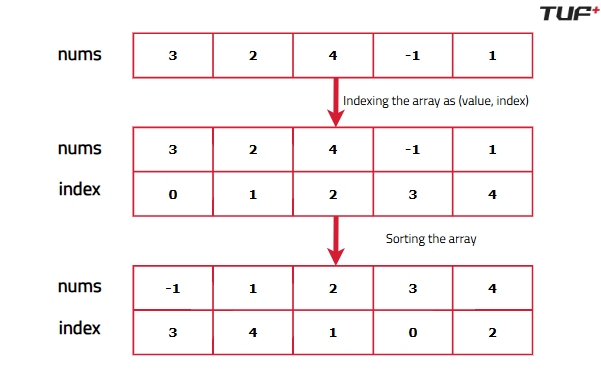
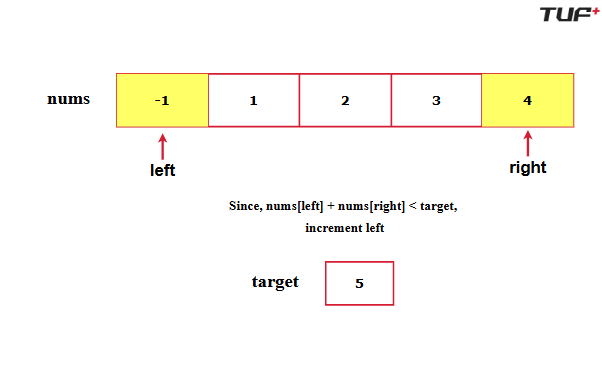
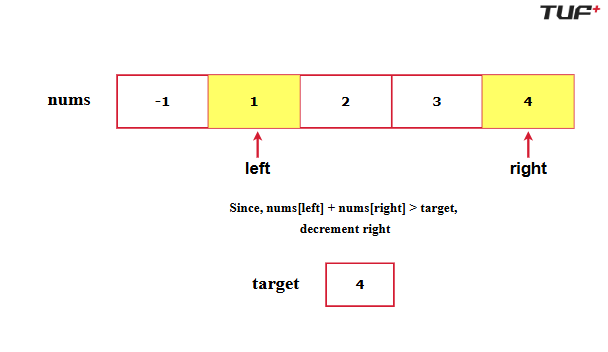
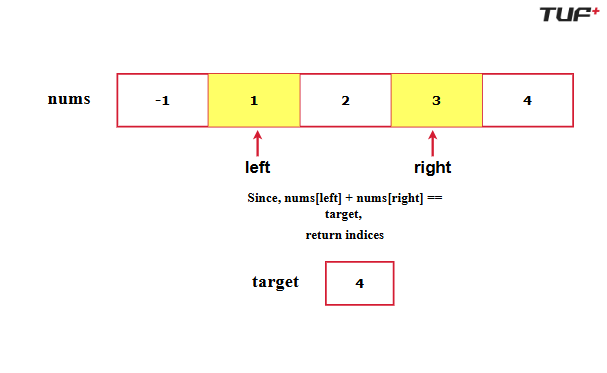
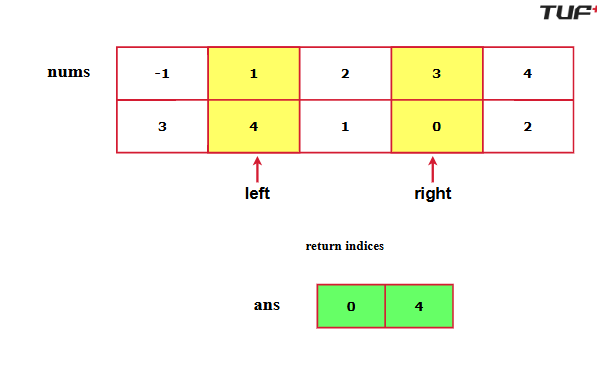

## Optimal Python Solution

In [5]:
from typing import List

class Solution:
    """ Function to find two indices in the array `nums`
       such that their elements sum up to `target`.
    """
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # Size of the nums array
        n = len(nums)
        
        # List to store indices of two numbers
        ans = [-1, -1]
        
        # 2D list to store [element, index] pairs
        eleIndex = []
        for i in range(len(nums)):
            eleIndex.append([nums[i], i])
        
        """ Sort eleIndex by the first
        element in ascending order"""
        eleIndex.sort(key=lambda x: x[0])

        """ Two pointers: one starting 
         from left and one from right"""
        left, right = 0, n - 1

        while left < right:
            """ Calculate sum of elements
            at left and right pointers"""
            sum_val = eleIndex[left][0] + eleIndex[right][0]

            if sum_val == target:
                
                """ If sum equals target,
                store indices and return"""
                ans[0] = eleIndex[left][1]
                ans[1] = eleIndex[right][1]
                return ans
                
            elif sum_val < target:
                
                """ If sum is less than target,
                move left pointer to the right"""
                left += 1
                
            else:
                
                """ If sum is greater than target,
                move right pointer to the left"""
                right -= 1

        # If no such pair found, return [-1, -1]
        return ans

In [6]:
if __name__ == "__main__":
    nums = [2, 6, 5, 8, 11]
    target = 14

    # Create an instance of Solution class
    sol = Solution()

    ans = sol.twoSum(nums, target)

    # Print the result
    print(f"Indices of the two numbers that sum up to {target} are: [{ans[0]}, {ans[1]}]")

Indices of the two numbers that sum up to 14 are: [1, 3]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) + O(N*logN), where N is size of the array. This is because the loop will run at most N times & sorting the array will take (N*logN) time complexity.
```

**Space Complexity:**
```
The Space Complexity will be O(N), because of the external data structure created to store the array elements along with their indices.

```

# 2. Sort an Array of 0's, 1's and 2's :

## Problem Statement :

Given an array nums consisting of only 0s, 1s, or 2s, sort the array in non-decreasing order.
The sorting must be done in-place, without making a copy of the original array.


### Examples :

**Example 1:**
```
Input: nums = [1, 0, 2, 1, 0]
Output: [0, 0, 1, 1, 2]

Explanation:
The nums array in sorted order has 2 zeroes, 2 ones and 1 two.
```

**Example 2:**
```
Input: nums = [0, 0, 1, 1, 1]
Output: [0, 0, 1, 1, 1]

Explanation:
The nums array in sorted order has 2 zeroes, 3 ones and zero twos.
```

```
Constraints:
1 <= nums.length <= 10^5
nums consists of 0, 1 and 2 only.
```

# Brute Force Solution

### Intuition

The easiest way is to sort the array using any optimal sorting algorithm. It will ensure to sort the array of 0's, 1's and 2's in ascending order.

### Approach

Sort the array using built-in function for sorting. It will manage to sort the array in optimal time.

## Brute Force Python Solution

In [7]:
from typing import List
class Solution:
    # Function to sort the array
    def sortZeroOneTwo(self, nums):
        # Sort the list using sorted() function
        nums.sort()

In [8]:
# Main function
if __name__ == "__main__":
    nums = [2, 0, 1, 1, 0, 2]
    
    # Create an instance of Solution class
    sol = Solution()
    
    sol.sortZeroOneTwo(nums)
    
    # Print the array elements
    print(" ".join(map(str, nums)))

0 0 1 1 2 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N*logN), where N is the size of the array, as the optimal sorting takes O(N*logN) time.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is used to solve the problem.
```

# Better Solution

### Intuition

The better way is to keep the count of 0's, 1's and 2's. Since there are only 3 distinct values in the array so it's easy to maintain the count of all. Then we can overwrite the array based on the frequencies of 0's, 1's, 2's.

### Approach

* Initialize 3 variables to maintain the count of 0, 1 and 2 & iterate in the array to store the frequencies of the 0's, 1's, 2's in their corresponding variables.* 
Perform a 2nd traversal of array, to overwrite the array according to the frequencies, first filling up the indices by 0's, then by 1's and at last by 2's. Finally return the array.

## Better Python Solution

In [9]:
from typing import List
class Solution:
    # Function to sort the array containing only 0s, 1s, and 2s
    def sortZeroOneTwo(self, nums):
        cnt0 = 0
        cnt1 = 0
        cnt2 = 0

        # Counting the number of 0s, 1s, and 2s in the array
        for num in nums:
            if num == 0:
                cnt0 += 1
            elif num == 1:
                cnt1 += 1
            else:
                cnt2 += 1

        """ Placing the elements in the
            original array based on counts """
        # placing 0's
        for i in range(cnt0):
            nums[i] = 0

        # placing 1's
        for i in range(cnt0, cnt0 + cnt1):
            nums[i] = 1

        # placing 2's
        for i in range(cnt0 + cnt1, len(nums)):
            nums[i] = 2

In [10]:
if __name__ == "__main__":
    nums = [0, 2, 1, 2, 0, 1]
    
    # Create an instance of Solution class
    sol = Solution()
    
    sol.sortZeroOneTwo(nums)
    
    # Print the array elements after sorting
    print("After sorting:")
    print(" ".join(map(str, nums)))

After sorting:
0 0 1 1 2 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) + O(N) = O(2N), where N is the size of the array. There are 2 traversals in the array to count the frequencies, and then in second iteration we are overwriting.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is used.
```

# Optimal Solution

### Intuition

The optimal solution is a variation of the popular <b>Dutch National flag algorithm.</b>

This algorithm contains 3 pointers i.e. low, mid, and high, and 3 main rules.

```
Index 0 to low -1 contains 0
Index low to mid - 1 contains 1
Index high + 1 to sizeOfArray - 1 contains 2.
```

The middle part i.e. mid to high is the unsorted segment. So, this part is a mix of 0's, 1's and 2's. Follow the rules mentioned in approach and image below and sort the array.

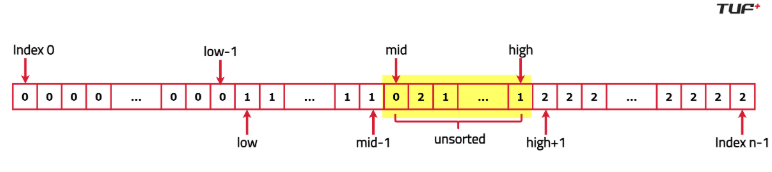

### Approach

* Initialize low and mid at 0 and high is sizeOfArray - 1, & iterate in the array until mid <= high. There can be three different values of mid pointer i.e. arr[mid].

```
If arr[mid] is equal to 0, swap arr[low] and arr[mid] and increment both low and mid. Now the subarray from index 0 to (low-1) only contains 0.
If arr[mid] is equal to 1, just increment the mid pointer and then the index (mid-1) will point to 1 as it should according to the rules.
If arr[mid] is equal to 2, swap arr[mid] and arr[high] and decrement high. Now the subarray from index high+1 to (n-1) only contains 2. In this step, do nothing to the mid-pointer as even after swapping, the subarray from mid to high (after decrementing high) might be unsorted. So, check the value of mid again in the next iteration. Finally, the array should be sorted.
```

## Dry Run

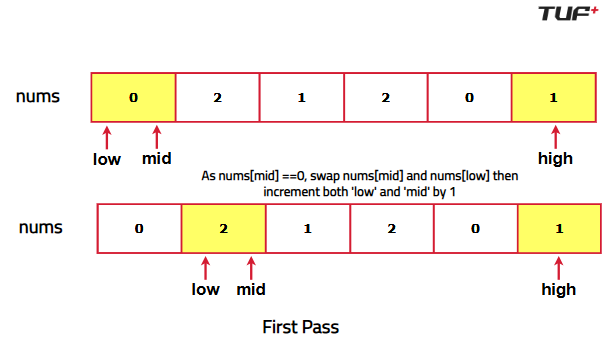
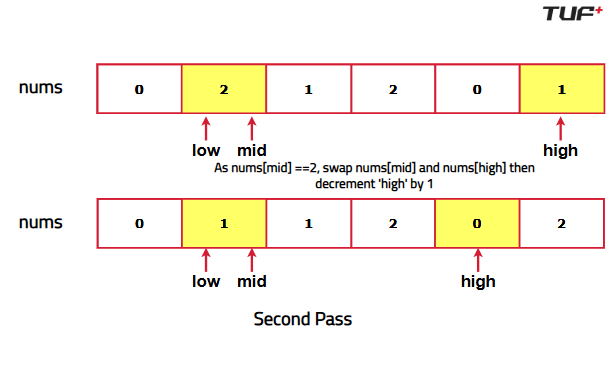
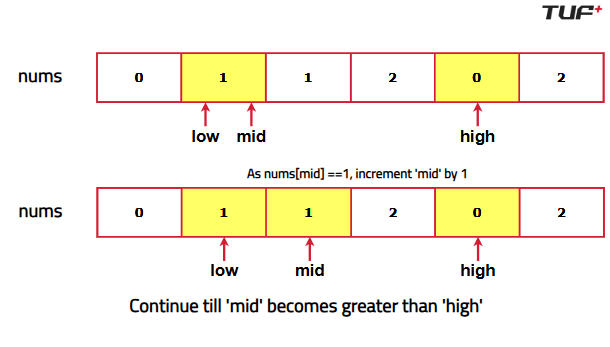
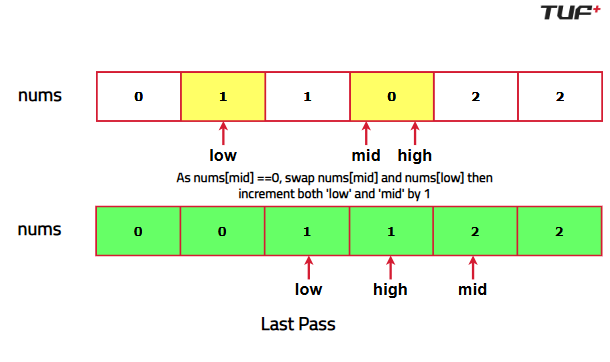

## Optimal Python Solution

In [11]:
from typing import List
class Solution:
    # Function to sort the array containing only 0s, 1s, and 2s
    def sortZeroOneTwo(self, nums):
        # 3 pointers: low, mid, high
        low, mid, high = 0, 0, len(nums) - 1
        
        while mid <= high:
            if nums[mid] == 0:
                
                """ Swap nums[low] and nums[mid], then
                move both low and mid pointers forward"""
                nums[low], nums[mid] = nums[mid], nums[low]
                low += 1
                mid += 1
                
            elif nums[mid] == 1:
                
                # Move mid pointer forward
                mid += 1
                
            else:
                
                """ Swap nums[mid] and nums[high], 
                then move high pointer backward"""
                nums[mid], nums[high] = nums[high], nums[mid]
                high -= 1

In [12]:
# Main function for testing
if __name__ == "__main__":
    nums = [0, 2, 1, 2, 0, 1]
    
    # Create an instance of Solution class
    sol = Solution()

    sol.sortZeroOneTwo(nums)
    
    # Print the array elements after sorting
    print("After sorting:")
    print(nums)

After sorting:
[0, 0, 1, 1, 2, 2]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array, as there is single traversal of the array.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is used.
```

# 3. Majority Element - I (>N/2 times) :

## Problem Statement :

Given an integer array nums of size n, return the majority element of the array.

<b>The majority element of an array is an element that appears more than n/2 times in the array. The array is guaranteed to have a majority element.</b>


### Examples :

**Example 1:**
```
Input: nums = [7, 0, 0, 1, 7, 7, 2, 7, 7]
Output: 7

Explanation:
The number 7 appears 5 times in the 9 sized array.
```

**Example 2:**
```
Input: nums = [1, 1, 1, 2, 1, 2]
Output: 1

Explanation:
The number 1 appears 4 times in the 6 sized array.
```

```
Constraints:
n == nums.length
1 <= n <= 10^5
-10^4 <= nums[i] <= 10^4
One value appears more than n/2 times
```

# Brute Force Solution

### Intuition

Naive way is to count the occurrences of each element. The element which will have count greater than half the array size will be the majority element.

### Approach

* Iterate in the array to select the elements of the array one by one. Now, for each element, run another loop and count its occurrence in the given array.* 
If any element occurs more than the floor of (N/2), simply return it.

## Brute Force Python Solution

In [13]:
from typing import List

class Solution:
    # Function to find the majority element in an array
    def majorityElement(self, nums: List[int]) -> int:
        
        # Size of the given array
        n = len(nums)
        
        # Iterate through each element of the array
        for i in range(n):
            
            # Counter to count occurrences of nums[i]
            cnt = 0 
            
            # Count the frequency of nums[i] in the array
            for j in range(n):
                if nums[j] == nums[i]:
                    cnt += 1
            
            # Check if frequency of nums[i] is greater than n/2
            if cnt > (n // 2):
                # Return the majority element
                return nums[i]
        
        # Return -1 if no majority element is found
        return -1

In [14]:
if __name__ == "__main__":
    arr = [2, 2, 1, 1, 1, 2, 2]
    
    # Create an instance of Solution class
    sol = Solution()
 
    ans = sol.majorityElement(arr)
    
    # Print the majority element found
    print("The majority element is:", ans)

The majority element is: 2


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), for nested for loops used, where N is the size of the array.

**Space Complexity:**

The Space Complexity will be O(1) as no extra space is used.

# Better Solution

### Intuition

The idea is to use a better data structure to reduce the number of look-up operations and hence reducing the time complexity. Moreover, we have been calculating the count of the same element again and again, and hence we try to reduce that as well.

### Approach

* Use a hashmap and store as (key, value) pairs. Here the key will be the element of the array and the value will be the number of times it occurs.
Traverse the array and update the value of the key. Simultaneously check if the value is greater than the floor of N/2. If yes, return the key and, iterate forwar otherwised.

## Better Python Solution

In [15]:
from typing import List

class Solution:
    # Function to find the majority element in an array
    def majorityElement(self, nums: List[int]) -> int:
        
        # Size of the given array
        n = len(nums)
        
        # Hash map to store element counts
        mp = {}
        
        # Count occurrences of each element
        for num in nums:
            if num in mp:
                mp[num] += 1
            else:
                mp[num] = 1
        
        """ Iterate through the map to
        find the majority element"""
        for num, count in mp.items():
            if count > n // 2:
                return num
        
        # Return -1 if no majority element is found
        return -1

In [16]:
# Main function to test the Solution class
if __name__ == "__main__":
    arr = [2, 2, 1, 1, 1, 2, 2]
    
    # Create an instance of Solution class
    sol = Solution()
 
    ans = sol.majorityElement(arr)
    
    # Print the majority element found
    print("The majority element is:", ans)

The majority element is: 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array.

The code goes through the array once to count frequencies using a hash map (O(N)), then checks the map to find the majority element (O(N) in the worst case). Since these are separate linear operations, the overall time complexity is O(N).
```

**Space Complexity:**
```
The Space Complexity will beO(N), for using a map data structure..
```

# Optimal Solution

### Intuition

Imagine you are at a large party, and you want to determine which dish is the most popular. Each guest has brought a dish, and some dishes are brought by more guests than others. The party is large enough that one dish is guaranteed to be the majority dish, meaning it was brought by more than half of the guests.

Initial observation is as we move around the party, you decide to start keeping track of the dishes in a specific way. Begin with no specific dish in mind and no count. On seeing each dish, do the following:

```
If you don’t have a dish you’re tracking yet, start tracking the current dish and set its count to 1.
If the current dish matches the one you’re tracking, increase its count by 1.
If the current dish doesn’t match the one you’re tracking, decrease the count by 1. If the count drops to zero, stop tracking that dish and start tracking the next dish.
```

The idea is that at any point where the count of tracked dishes drops to zero, it means up to that point, the popularity of different dishes has balanced out. This reset allows you to focus on potentially more popular dishes as you continue through the party. At the end check which dish you ended up tracking last. This dish is your candidate for the most popular dish. To confirm if this dish is indeed the majority dish, recount its appearances to see if it indeed makes up more than half of all dishes at the party. If it does, then you have found your majority dish. If it doesn’t, there was an error in the process, but for this scenario, we assume the party is large enough to guarantee one majority dish.


### Approach

* Initialize 2 variables: count for tracking the count of elements and element for keeping a track of the element we are counting.
* Traverse through the given array. If count is 0 then store the current value of the array as element .
* If the current array value and element are the same increase the count by 1. If they are different decrease the count by 1. The integer present in element should be the result expected.

## Dry Run

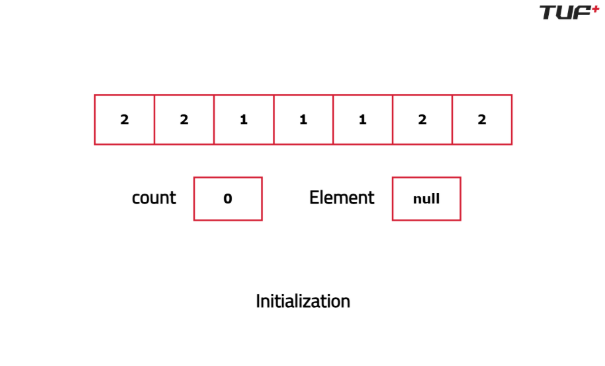
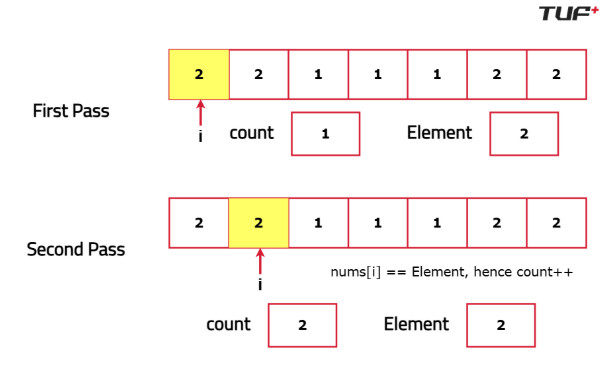
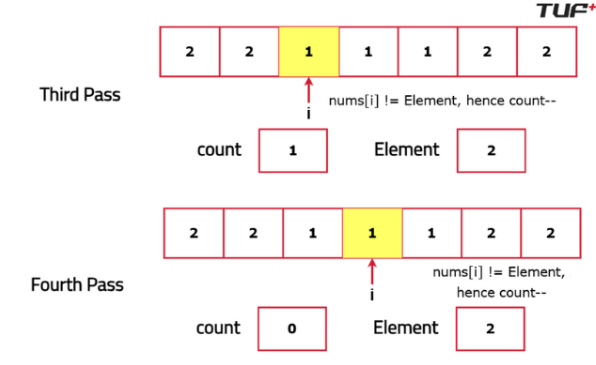
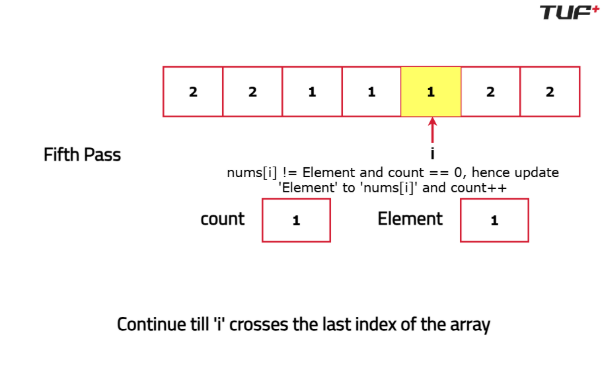
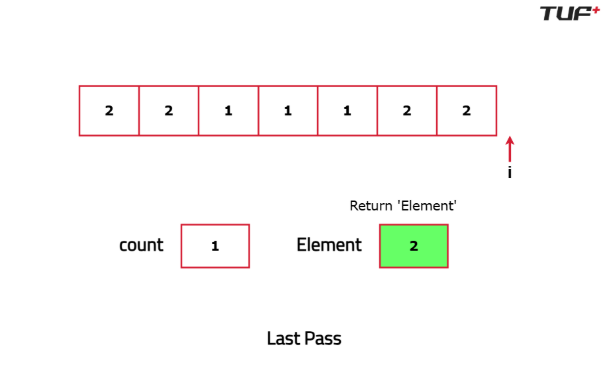

## Optimal Python Solution

In [17]:
from typing import List

class Solution:
    # Function to find the majority element in an array
    def majorityElement(self, nums: List[int]) -> int:
        
        # Size of the given array
        n = len(nums)
        
        # Count
        cnt = 0
        
        # Element
        el = 0
        
        # Applying the algorithm
        for num in nums:
            if cnt == 0:
                cnt = 1
                el = num
            elif el == num:
                cnt += 1
            else:
                cnt -= 1
        
        """ Checking if the stored element
        is the majority element"""
        cnt1 = nums.count(el)
        
        # Return element if it is a majority element
        if cnt1 > (n // 2):
            return el
        
        # Return -1 if no such element found
        return -1

In [18]:
# Test the solution with the given example
arr = [2, 2, 1, 1, 1, 2, 2]

# Create an instance of Solution class
sol = Solution()

ans = sol.majorityElement(arr)

# Print the majority element found
print(f"The majority element is: {ans}")

The majority element is: 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) + O(N), where N is size of the given array. The first O(N) is to calculate the count and find the expected majority element. The second one is to check if the expected element is the majority one or not.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is used.
```

# 4. Kadane's Algorithm (Maximum Subarray Sum) :

## Problem Statement :

Given an integer array nums, find the subarray with the largest sum and return the sum of the elements present in that subarray.

<b>A subarray is a contiguous non-empty sequence of elements within an array.</b>


### Examples :

**Example 1:**
```
Input: nums = [2, 3, 5, -2, 7, -4]
Output: 15

Explanation:
The subarray from index 0 to index 4 has the largest sum = 15.
```

**Example 2:**
```
Input: nums = [-2, -3, -7, -2, -10, -4]
Output: -2

Explanation:
The element on index 0 or index 3 make up the largest sum when taken as a subarray.
```

```
Constraints:
1 <= nums.length <= 10^5
-10^4 <= nums[i] <= 10^4
```

# Brute Force Solution

### Intuition

The idea is to find out all the subarrays of the given array and while finding out the subarray calculate the sum of all the elements of that particular subarray. Finally, find out the maximum sum among them and that will be the result.

### Approach

* Iterate in the array lets say i, this variable will select every possible starting index of the subarray. The possible starting indices can vary from index 0 to index n-1. (n = size of the array).
* Inside the loop, run another loop (say j) that will signify the ending index of the subarray. For every subarray starting from the index i, the possible ending index can vary from index i to n-1 (n = size of the array).
* After that for each subarray starting from index i and ending at index j, iterate again to calculate the sum of all the elements(of that particular subarray). Use a max variable to store the maximum sum so far and finally, return the max variable.

## Brute Force Python Solution

In [19]:
from typing import List

class Solution:
    # Function to find maximum sum of subarrays
    def maxSubArray(self, nums: list[int]) -> int:
        
        """ Initialize maximum sum with
        the smallest possible integer"""
        maxi = float('-inf')

        # Iterate over each starting index of subarrays
        for i in range(len(nums)):
            
            """ Iterate over each ending index
            of subarrays starting from i"""
            for j in range(i, len(nums)):
                
                """ Variable to store the sum
                of the current subarray"""
                sum = 0

                # Calculate the sum of subarray nums[i...j]
                for k in range(i, j + 1):
                    sum += nums[k]

                """ Update maxi with the maximum of itscurrent
                value and the sum of the current subarray"""
                maxi = max(maxi, sum)

        # Return the maximum subarray sum found
        return maxi

In [20]:
# Test
arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

#create an isinstance of Solution class
sol = Solution()

maxSum = sol.maxSubArray(arr)

#Print the max sum of subarrays
print("The maximum subarray sum is:", maxSum)

The maximum subarray sum is: 6


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^3$), where N is the size of the array. This is because we are using three nested loops, each running approximately N times.

**Space Complexity:**

The Space Complexity will be O(1) as no extra space is used.

# Better Solution

### Intuition

The better approach is to avoid the triple looping structure mentioned previously that calculates the sum of each subarray. On observation we understand that to get the sum of the current subarray we just need to add the current element to the sum of the previous subarray, and hence there is no need of a third loop to do that.

### Approach

* Iterate in the array, let's say i to select every possible starting index of the subarray. The possible starting indices can vary from index 0 to index n-1 (n is the array size).
* Inside the loop, iterate again let's say j that will signify the ending index as well as the current element of the subarray. For every subarray starting from index i, the possible ending index can vary from index i to n-1 (n is size of the array).
* Inside loop j, keep adding the current element to the sum of the previous subarray. Among all the sums, the maximum one will be the answer and return it.

## Better Python Solution

In [21]:
from typing import List

class Solution:
    # Function to find maximum sum of subarrays
    def maxSubArray(self, nums: List[int]) -> int:
        
        """ Initialize maximum sum with
         the smallest possible integer"""
        maxi = float('-inf')

        # Iterate over each starting index of subarrays
        for i in range(len(nums)):
            
            """ Variable to store the sum
             of the current subarray"""
            sum = 0
            
            """ Iterate over each ending index
             of subarrays starting from i"""
            for j in range(i, len(nums)):
                
                """ Add the current element nums[j] to
                 the sum i.e. sum of nums[i...j-1]"""
                sum += nums[j]

                """ Update maxi with the maximum of its current
                 value and the sum of the current subarray"""
                maxi = max(maxi, sum)

        # Return the maximum subarray sum found
        return maxi

In [22]:
# Main function to test the Solution class
if __name__ == "__main__":
    arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

    # Create an instance of Solution class
    sol = Solution()

    maxSum = sol.maxSubArray(arr)

    # Print the max subarray sum
    print(f"The maximum subarray sum is: {maxSum}")

The maximum subarray sum is: 6


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), because we are using 2 nested loops, each running approximately N times, where N is the size of the array.

**Space Complexity:**

The Space Complexity will be O(1) because we are not using any extra space.

# Optimal Solution

### Intuition

<b>The intuition of the algorithm is to not consider the subarray as a part of the answer if its sum is less than 0.</b> A subarray with a sum less than 0 will always reduce the answer and so this type of subarray cannot be a part of the subarray with maximum sum.

### Approach

* Iterate in the array using a variable i & while iterating add the elements to the sum variable and consider the maximum one.* 
If at any point the sum becomes negative, reset the sum to 0 as that will be not considered as a part of our answer. Finally, return the maximum sum.

## Dry Run

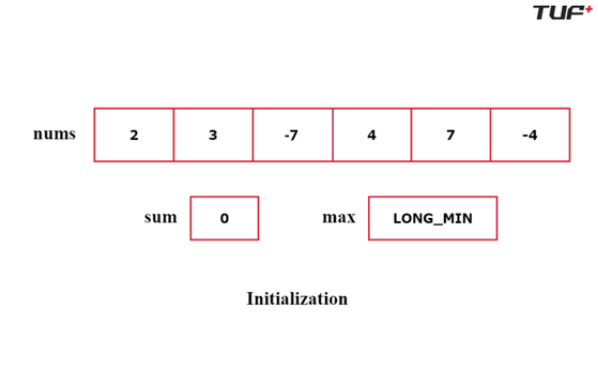
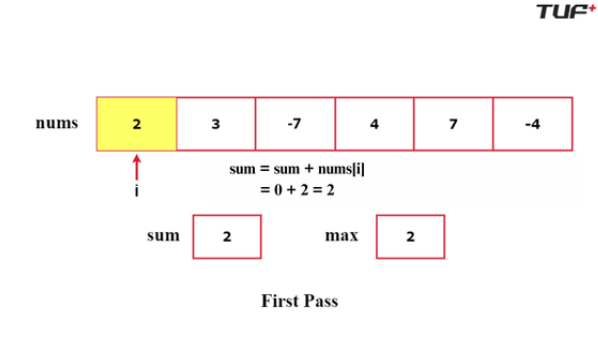
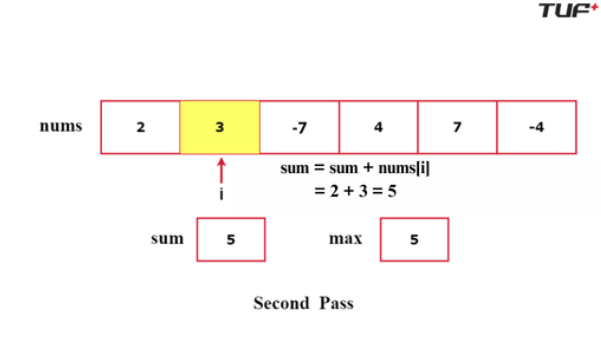
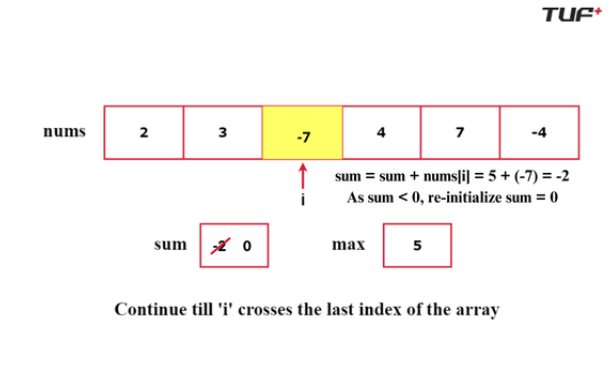
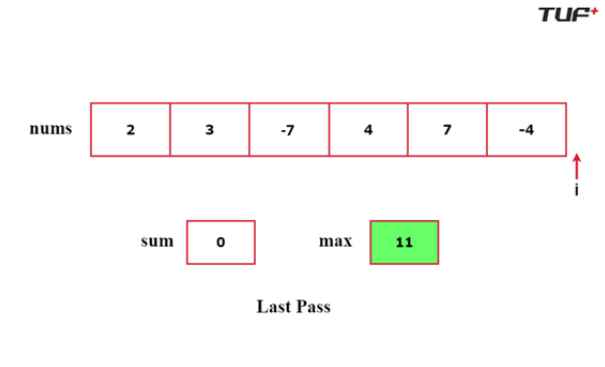

## Optimal Python Solution

In [23]:
from typing import List

class Solution:
    # Function to find maximum sum of subarrays
    def maxSubArray(self, nums: List[int]) -> int:
        
        # maximum sum
        maxi = float('-inf') 
        
        # current sum of subarray
        sum = 0 
        
        # Iterate through the array
        for i in range(len(nums)):
            
            # Add current element to the sum
            sum += nums[i] 
            
            # Update maxi if current sum is greater
            if sum > maxi:
                maxi = sum 
            
            # Reset sum to 0 if it becomes negative
            if sum < 0:
                sum = 0 
        
        # Return the maximum subarray sum found
        return maxi

In [24]:
if __name__ == "__main__":
    arr = [ -2, 1, -3, 4, -1, 2, 1, -5, 4 ]

    # Create an instance of Solution class
    sol = Solution()

    maxSum = sol.maxSubArray(arr)

    # Print the max subarray sum
    print(f"The maximum subarray sum is: {maxSum}")

The maximum subarray sum is: 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), for a single traversal, where N is the size of the array. 
```

**Space Complexity:**
```
The Space Complexity will be O(1), since we are not using any extra space.
```

# 5. Kadane's Algorithm Follow-up (Print Subarray with Maximum Subarray Sum) :

## Follow Up Question :

Can you print the subarray that has the max sum?

### Intuition

The idea is to store the starting index and the ending index of the subarray. Thus its easily possible to get the subarray with maximum sum afterward without actually storing the subarray elements. On careful observation we can notice that the subarray always starts at the particular index where the sum variable is equal to 0, and at the ending index, the sum always crosses the previous maximum sum. Using this observation print the subarray with maximum sum.

### Approach

* Keep a track of the starting index of the subarray inside the loop, using a start variable.* 
Initialize two variables ansStart and ansEnd with -1, & when the sum crosses the maximum sum, set ansStart to the start variable and ansEnd to the current index i.e. i. Rest of the steps are exacly thet same as Kadane's Algorithm.

## Optimal Python Solution

In [25]:
from typing import List

class Solution:
    # Function to find maximum sum of subarrays and print the subarray having maximum sum
    def maxSubArray(self, nums: List[int]) -> int:
        
        # maximum sum
        maxi = float('-inf') 
        
        # current sum of subarray
        sum = 0 
        
        # starting index of current subarray
        start = 0 
        
        # indices of the maximum sum subarray
        ansStart = -1
        ansEnd = -1
        
        # Iterate through the array
        for i in range(len(nums)):
            
            # update starting index if sum is reset
            if sum == 0:
                start = i
            
            # add current element to the sum
            sum += nums[i] 
            
            """ Update maxi and subarray indices
            if current sum is greater """
            if sum > maxi:
                maxi = sum
                ansStart = start
                ansEnd = i
            
            # Reset sum to 0 if it becomes negative
            if sum < 0:
                sum = 0
        
        # Printing the subarray
        print("The subarray is: [", end="")
        for i in range(ansStart, ansEnd + 1):
            print(nums[i], end=" ")
        print("]")

        # Return the maximum subarray sum found
        return maxi

In [26]:
if __name__ == "__main__":
    arr = [ -2, 1, -3, 4, -1, 2, 1, -5, 4 ]

    # Create an instance of Solution class
    sol = Solution()

    maxSum = sol.maxSubArray(arr)

    # Print the max subarray sum
    print(f"The maximum subarray sum is: {maxSum}")

The subarray is: [4 -1 2 1 ]
The maximum subarray sum is: 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), for using a single loop running N times, where N is the size of the array.
```

**Space Complexity:**
```
The Space Complexity will be O(1), for not using any extra space.
```

# 6. Best Time to Buy and Sell Stock :

## Problem Statement :

Given an array arr of n integers, where arr[i] represents price of the stock on the ith day. Determine the maximum profit achievable by buying and selling the stock at most once. 

The stock should be purchased before selling it, and both actions cannot occur on the same day.


### Examples :

**Example 1:**
```
Input: arr = [10, 7, 5, 8, 11, 9]
Output: 6

Explanation: Buy on day 3 (price = 5) and sell on day 5 (price = 11), profit = 11 - 5 = 6.
```

**Example 2:**
```
Input: arr = [5, 4, 3, 2, 1]
Output: 0

Explanation: In this case, no transactions are made. Therefore, the maximum profit remains 0.
```

```
Constraints:
1 <= n<= 10^5
0 <= arr[i] <= 10^6
```

# Optimal Solution

### Intuition

As we need to find the maximum profit, the idea is to buy the stock at its lowest price and sell it at its highest price. We can attempt to sell the stock every day and determine the maximum profit achievable by selling it on that specific day. Ultimately, we return the maximum of these individual maximum profits as our answer.

To compute the maximum profit on a particular day, given the selling price, we need to identify the buying price. To maximize the profit on day, the buying price should be the lowest stock price observed from day 0 to the present day(as shown in the graph). This approach enables us to accurately track the optimal buying price for any given day.


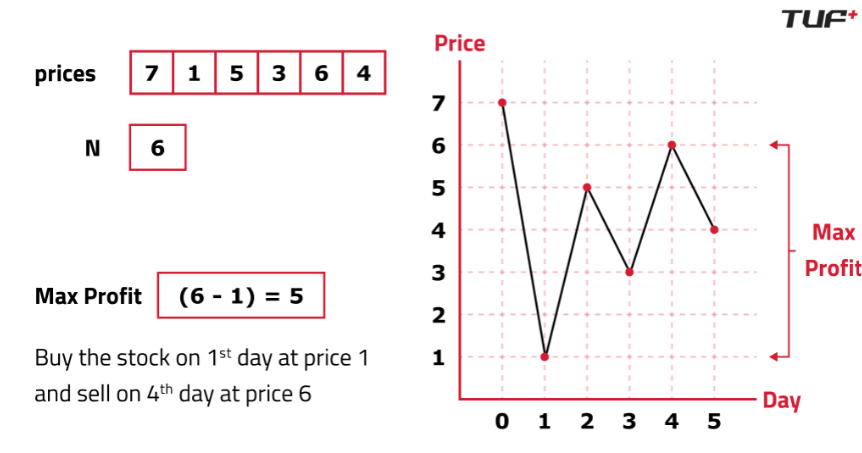

### Approach

* Initialize a variable ‘maxProfit’ to 0 and declare another variable ‘mini’ which we will use to keep track of the buying price (minimum price from day 0 to current day) for selling the stock.
* Traverse the array from index 1 to n-1. We started at index 1 because buying and selling the stock on the 0th day will give us a profit of 0, which we have initialized our maxProfit as already.
* In each iteration, try to find the curProfit. The selling price will be the current element and ‘mini’ will give us the buying price. Calculate the curProfit. If it is more than the existing profit value (maxProfit), we update the maxProfit value.
* Before going to the next iteration, check if the current price (Arr[i]) is less than the mini value, and assign it as the new 'mini' value. In this way, we keep track of the buying price in a single iteration itself.

## Optimal Python Solution

In [27]:
class Solution:
    # Function to calculate the maximum profit earned
    def stockBuySell(self, arr, n):
        maxProfit = 0
        # Initialize mini to the first element of arr
        mini = arr[0]

        # Traverse through the array
        for i in range(1, n):
            # Calculate current profit
            curProfit = arr[i] - mini
            
            # Update maxProfit if curProfit is larger
            maxProfit = max(maxProfit, curProfit)
            
            # Update mini to minimum value encountered so far
            mini = min(mini, arr[i])

        # Return the maximum profit
        return maxProfit

In [28]:
if __name__ == "__main__":
    Arr = [7, 1, 5, 3, 6, 4]
    n = 6

    # Create an instance of Solution class
    sol = Solution()

    # Call stockBuySell function and print the result
    print("The maximum profit by selling the stock is", sol.stockBuySell(Arr, n))

The maximum profit by selling the stock is 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n) as the whole array is being traversed only once.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is being used.
```

# 7. Rearrange the Array in Alternating Positive and Negative Items :

## Problem Statement :

Given an integer array nums of even length consisting of an equal number of positive and negative integers.Return the answer array in such a way that the given conditions are met:

```
Every consecutive pair of integers have opposite signs.
For all integers with the same sign, the order in which they were present in nums is preserved.
The rearranged array begins with a positive integer.
```

### Examples :

**Example 1:**
```
Input : nums = [2, 4, 5, -1, -3, -4]
Output : [2, -1, 4, -3, 5, -4]

Explanation:
The positive number 2, 4, 5 maintain their relative positions and -1, -3, -4 maintain their relative positions.
```

**Example 2:**
```
Input : nums = [1, -1, -3, -4, 2, 3]
Output : [1, -1, 2, -3, 3, -4]

Explanation:
The positive number 1, 2, 3 maintain their relative positions and -1, -3, -4 maintain their relative positions.
```

```
Constraints:
2 <= nums.length <= 10^5
1 <= | nums[i] | <= 10^4
nums.length is an even number.
Number of positive and negative numbers are equal.
```

# Brute Force Solution

### Intuition

As the array contains positive and negative elements, we can think of segregating the array elements into two parts. The first array will contain only positive elements and the second array will contain only negative elements. After this, we can just put the elements back in the original array alternatively. As the question states that positive elements should come first, so put positive element first and then negative one and so on. At the end of the process the original array will contain the desired result.

### Approach

* Since the number of positive and negative elements are the same, we put positives into an array called “pos” and negatives into an array called “neg”.
* After segregating each of the positive and negative elements, we start putting them alternatively back into the original array.
* Initialize an array which will run from 0 till (sizeOfArray/2 - 1) because the number of positive and negative elements are equal, so the total count of any of them will be equal to (sizeOfArray/2).
* Since the array must begin with a positive number and the start index is 0, so all the positive numbers would be placed at even indices (2*i) and negatives at the odd indices (2*i+1), where i is the index of the pos or neg array while traversing them simultaneously.

## Brute Force Python Solution

In [29]:
class Solution:
    # Function to rearrange the given array by signs
    def rearrangeArray(self, nums):
        n = len(nums)
        
        """ Define 2 vectors, one for storing positive 
        and other for negative elements of the array."""
        pos = []
        neg = []
  
        # Segregate the array into positives and negatives.
        for num in nums:
            if num > 0:
                pos.append(num)
            else:
                neg.append(num)
  
        # Positives on even indices, negatives on odd.
        for i in range(n // 2):
            nums[2 * i] = pos[i]
            nums[2 * i + 1] = neg[i]
        
        # Return the result
        return nums

In [30]:
if __name__ == "__main__":
    A = [1, 2, -4, -5]
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.rearrangeArray(A)
    
    # Print the result
    print(" ".join(map(str, ans)))

1 -4 2 -5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N+N/2), where N is the size of the array. O(N) part is for traversing the array once for segregating positives and negatives and another O(N/2) is for adding those elements alternatively to the array.
```

**Space Complexity:**
```
The Space Complexity will be O(N/2 + N/2) = O(N). N/2 space is required to store each of the positive and negative elements in separate arrays.
```

# Optimal Solution

### Intuition

Consider having a group of kids, and you need them to line up for a photo such that they alternate between wearing red shirts and blue shirts, and the line starts with a red shirt. Let's say there are equal numbers of kids wearing red and blue shirts.

Begin with the first position designated for a kid wearing a red shirt. The second position is for a kid wearing a blue shirt.

After calling out the kids, place the first red shirt kid at the first position. Then place the first blue shirt kid at the second position. Continue this process, placing each subsequent red shirt kid at the next available "red" position, and each blue shirt kid at the next available "blue" position.

### Approach

* Initialize two variables posIndex as 0 and negIndex as 1 initially.
* Now, iterate in the array & on encountering the first negative element, understand that its first position in resultant array should be starting from index 1, as initially positive number will be placed. And then each time when a negative number is found, its next position would be 2 steps ahead considering that a positive number will occupy space in between 2 negative numbers. So increment the position of negative number by 2.
* Similarly, when you encounter the first positive element, it occupies the position at index 0 in the resultant array, and then each time on finding a positive number, put it on the posIndex and it increments by 2.
* When both the negIndex and posIndex exceed the size of the array, stop the iteration as the whole array is now rearranged alternatively according to the sign.

## Dry Run

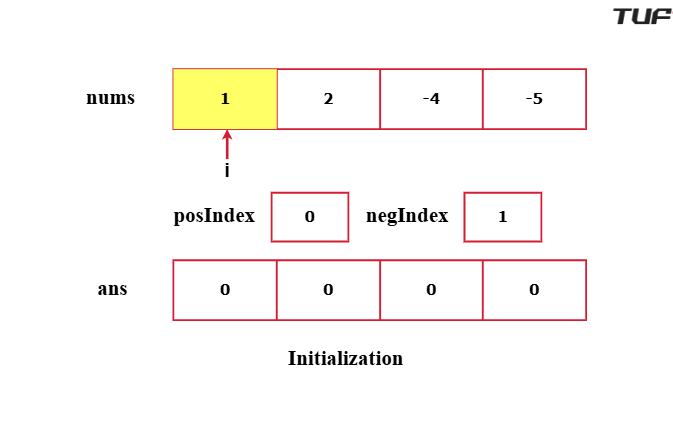
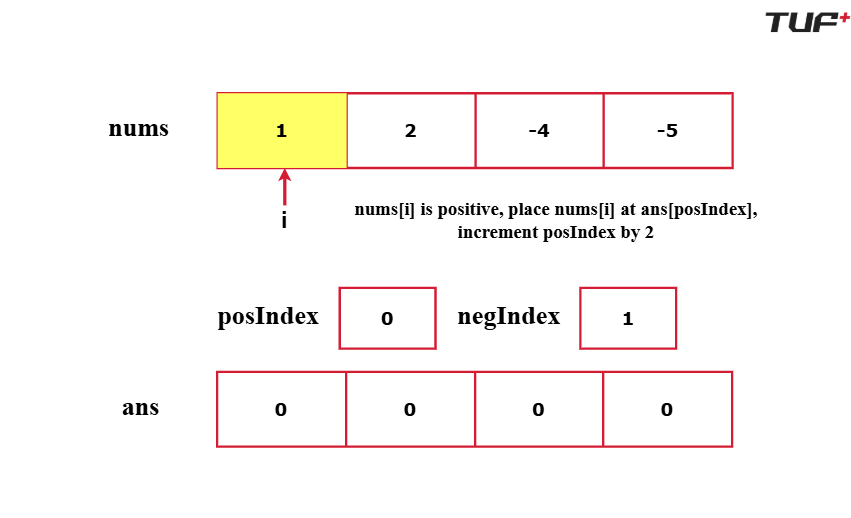
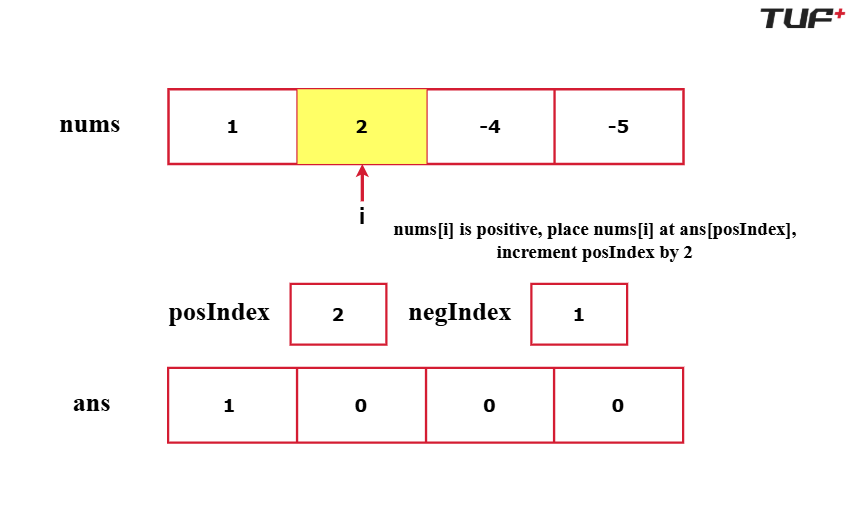
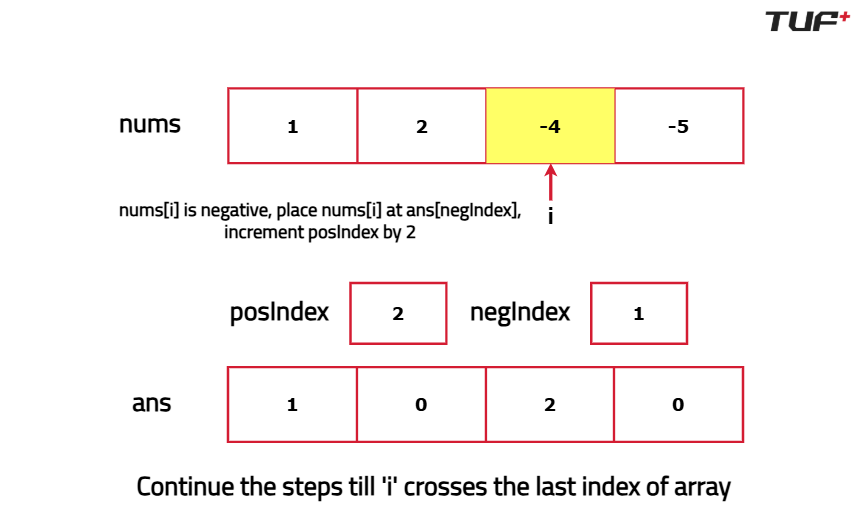
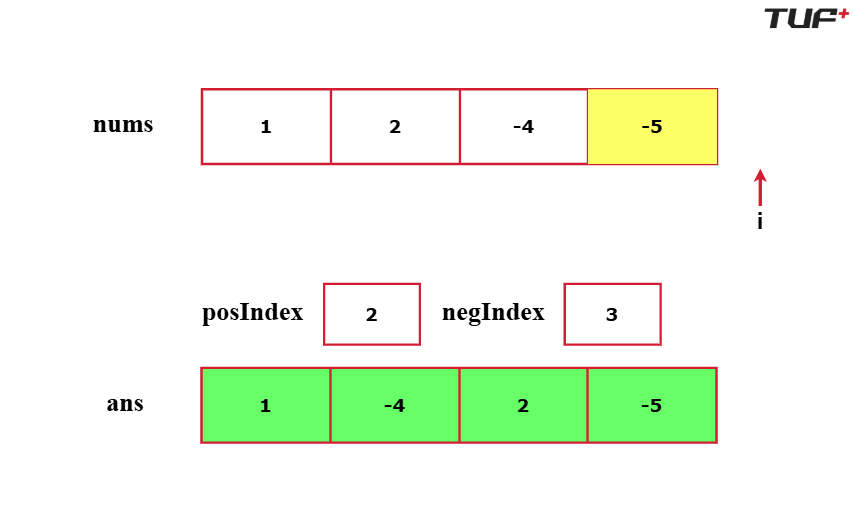

## Optimal Python Solution

In [31]:
from typing import List
class Solution:
    #Function to rearrange elements by their sign
    def rearrangeArray(self, nums: List[int]) -> List[int]:
        n = len(nums)
        
        # Initialize a result vector of size n
        ans = [0] * n  
        
        # Initialize indices for positive and negative elements
        posIndex, negIndex = 0, 1  
        
        # Traverse through each element in nums
        for i in range(n):
            if nums[i] < 0:
                
                """ If current element is negative, 
                place it at the next odd index in ans"""
                ans[negIndex] = nums[i]
                # Move to the next odd index
                negIndex += 2
                
            else:
                ans[posIndex] = nums[i]

                # Move to the next even index
                posIndex += 2
        
        # Return the rearranged array
        return ans

In [32]:
if __name__ == "__main__":
    A = [1, 2, -4, -5]
    
    # Create an instance of the Solution class
    sol = Solution()
    ans = sol.rearrangeArray(A)
    
    # Print the rearranged array
    print(" ".join(map(str, ans)))

1 -4 2 -5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), for traversing the array only once where N is the length of the array.
```

**Space Complexity:**
```
The Space Complexity will be O(N) to store the resultant array.
```

# 8. Next Permutation :

## Problem Statement :

A permutation of an array of integers is an arrangement of its members into a sequence or linear order.


For example, for arr = [1,2,3], the following are all the permutations of arr:

[1,2,3], [1,3,2], [2,1,3], [2,3,1], [3,1,2], [3,2,1].


The next permutation of an array of integers is the next lexicographically greater permutation of its integers.

<b>More formally, if all the permutations of the array are sorted in lexicographical order, then the next permutation of that array is the permutation that follows it in the sorted order.</b>


If such an arrangement is not possible (i.e., the array is the last permutation), then rearrange it to the lowest possible order (i.e., sorted in ascending order). You must rearrange the numbers in-place and use only constant extra memory.


### Examples :

**Example 1:**
```
Input: nums = [1,2,3]
Output: [1,3,2]

Explanation:
The next permutation of [1,2,3] is [1,3,2].
```

**Example 2:**
```
Input: nums = [3,2,1]
Output: [1,2,3]

Explanation:
[3,2,1] is the last permutation. So we return the first: [1,2,3].
```

```
Constraints:
1 <= nums.length <= 100
0 <= nums[i] <= 100
```

# Brute Force Solution

### Intuition

A straightforward but naive approach to solving this problem is to generate all possible permutations of the given array. Once all permutations are generated, we sort them in lexicographical order and perform a linear search to locate the current permutation. The next permutation in the sorted list is then returned. If the current permutation happens to be the last one, we simply return the first permutation from the sorted list.

To generate all permutations, we use <b>backtracking</b>, where we recursively swap each element with the current index and explore all possible configurations. After each recursive call, we backtrack by swapping the elements back to restore the original state. This ensures that we explore every unique arrangement without missing or repeating any permutations.

### Approach

* Generate all permutations of the given array using backtracking.
* Store each permutation in a result list after exploring all positions by swapping elements recursively.
* Sort the list of all permutations in lexicographical order.
* Find the current permutation's index using linear search.
* If the current permutation is the last in order, return the first permutation.
* Otherwise, return the next permutation from the sorted list.

## Brute Force Python Solution

In [33]:
from typing import List

class Solution:
    # Function to get the next permutation of given array
    def nextPermutation(self, nums: List[int]) -> None:
        # Get all the Permutations
        ans = self.getAllPermutations(nums)

        index = -1  # Current permutation index

        ''' Perform a linear search to get the
        permutation of current permutation '''
        for i in range(len(ans)):
            if list(nums) == ans[i]:
                index = i
                break

        # Store the next permutation in-place
        next_perm = ans[0] if index == len(ans) - 1 else ans[index + 1]
        for i in range(len(nums)):
            nums[i] = next_perm[i]

        return

    ''' Function to generate all permutations of 
    the given array in sorted order '''
    def getAllPermutations(self, nums: List[int]) -> List[List[int]]:
        ans = []  # To store the permutation

        # Recursive Helper function call 
        self.helperFunc(0, nums, ans)

        ans.sort()  # Sort the permutations
        return ans  # Return the result

    # Helper function to get all the permutations of the given array
    def helperFunc(self, ind: int, nums: List[int], ans: List[List[int]]) -> None:

        # Base case
        if ind == len(nums):
            # Add the permutation to the answer
            ans.append(nums[:])
            return

        # Traverse the array
        for i in range(ind, len(nums)):
            nums[ind], nums[i] = nums[i], nums[ind]  # Swap-In

            # Recursively call the helper function
            self.helperFunc(ind + 1, nums, ans)

            nums[ind], nums[i] = nums[i], nums[ind]  # Swap-Out

        return

In [34]:
if __name__ == "__main__":
    nums = [1, 2, 3]

    ''' Creating an instance of 
    Solution class '''
    sol = Solution()

    # Output
    print("Given array: ", end="")
    for x in nums:
        print(x, end=" ")

    # Function call to get the next permutation of given array
    sol.nextPermutation(nums)

    # Output
    print("\nNext Permutation: ", end="")
    for x in nums:
        print(x, end=" ")

Given array: 1 2 3 
Next Permutation: 1 3 2 

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N × N!), where N is the size of the input array.
Generating all permutations involves exploring N! arrangements, and each permutation requires O(N) time to construct, resulting in O(N × N!). Although sorting the permutations and performing a linear search add to the total time, the dominant factor remains O(N × N!) due to the exponential nature of permutation generation.
```

**Space Complexity:**
```
The Space Complexity will beO(N × N!).
Recursion stack takes up to O(N) space, and storing all permutations requires O(N × N!) space..
```

# Optimal Solution

### Intuition

To find the next lexicographical permutation of an array, <b>the key is to make the smallest possible change that results in a larger arrangement.</b>

The process begins by identifying a position in the array — called the pivot — where the value is smaller than the value immediately to its right. This break in descending order indicates where an increase in the permutation is possible. The pivot is the point from where the array stops being in non-increasing order when scanned from right to left.

Once the pivot is found, the goal is to make the next permutation just slightly larger. To do this, scan from the end again to find the first number greater than the pivot. Swapping these two values ensures the increase in the number is minimal, keeping the permutation as close as possible to the original.

After the swap, the portion of the array after the pivot is still in descending order, which is the highest possible order for those elements. To obtain the smallest possible suffix, this subarray can be reversed so that the elements are arranged in ascending order. This guarantees the next immediate permutation in lexicographical order.

### Approach

* Start from the end of the array.
* Find the first index where a smaller number is followed by a larger one.
* If no such index is found, the array is the last permutation.
* In that case, reverse the entire array and return.
* Otherwise, find the first number from the end that is greater than the number at the found index.
* Swap these two numbers.
* Reverse the subarray after the swapped index.
* This gives the next lexicographically greater permutation.

## Optimal Python Solution

In [35]:
class Solution:
    # Function to get the next permutation of given array
    def nextPermutation(self, nums):
        n = len(nums)  # Size of the given array

        # To store the index of the first smaller element from right
        ind = -1

        # Find the first index from the end where nums[i] < nums[i+1]
        for i in range(n-2, -1, -1):
            if nums[i] < nums[i+1]:
                ind = i
                break

        ''' If no such index exists, array is in descending order
            So, reverse it to get the smallest permutation '''
        if ind == -1:
            nums.reverse()
            return

        # Find the element just greater than nums[ind] from the end
        for i in range(n-1, ind, -1):
            if nums[i] > nums[ind]:
                nums[i], nums[ind] = nums[ind], nums[i]  # Swap with nums[ind]
                break

        # Reverse the right half to get the next smallest permutation
        nums[ind+1:] = reversed(nums[ind+1:])
        return

In [36]:
if __name__ == "__main__":
    nums = [1, 2, 3]

    ''' Creating an instance of 
        Solution class '''
    sol = Solution()

    # Output the original array
    print("Given array: ", end="")
    for x in nums:
        print(x, end=" ")

    # Function call to get the next permutation of given array
    sol.nextPermutation(nums)

    # Output the next permutation
    print("\nNext Permutation: ", end="")
    for x in nums:
        print(x, end=" ")

Given array: 1 2 3 
Next Permutation: 1 3 2 

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the input array.
Finding the pivot takes O(N) time. Finding the next greater element also takes O(N) in the worst case. Also, reversing the subarray takes O(N). All this adds up to a total of O(N) time complexity.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as the modification is done in-place and no extra data structure was used apart from a few variables.
```

# 9. Leaders in an Array Problem :

## Problem Statement :

Given an integer array nums, return a list of all the leaders in the array.

<b>A leader in an array is an element whose value is strictly greater than all elements to its right in the given array. The rightmost element is always a leader. The elements in the leader array must appear in the order they appear in the nums array.</b>

### Examples :

**Example 1:**
```
Input: nums = [1, 2, 5, 3, 1, 2]
Output: [5, 3, 2]

Explanation:
2 is the rightmost element, 3 is the largest element in the index range [3, 5], 5 is the largest element in the index range [2, 5].
```

**Example 2:**
```
Input: nums = [-3, 4, 5, 1, -4, -5]
Output: [5, 1, -4, -5]

Explanation:

-5 is the rightmost element, -4 is the largest element in the index range [4, 5], 1 is the largest element in the index range [3, 5] and 5 is the largest element in the range [2, 5].
```

```
Constraints:
1 <= nums.length <= 10^5
-10^4 <= nums[i] <= 10^4
```

# Brute Force Solution

### Intuition

The most naive thing that comes to mind is if at all any element on right is greater than the current element, then the current element can never be a leader.

### Approach

* Iterate through each element of the array with the variable let's say i and take a boolean variable leader set at true initially which will tell if nums[i] is a leader or not.
* For each i, iterate through the elements to the right (from i+1 to the end of the array) with the variable j & check if nums[j] is greater than nums[i], if so, reinitialize the variable leader as false and break.
* After exiting from the inner loop, check if leader equals true, if so add nums[i] to ans vector. Finally return the answer vector.

## Brute Force Python Solution

In [37]:
class Solution:
    # Function to find leaders in an array.
    def leaders(self, nums):
        ans = []

        # Iterate through each element in nums
        for i in range(len(nums)):
            leader = True

            '''Check whether nums[i] is greater
            than all elements to its right'''
            for j in range(i + 1, len(nums)):
                if nums[j] >= nums[i]:
                    '''If any element to the right is greater 
                    or equal, nums[i] is not a leader'''
                    leader = False
                    break

            # If nums[i] is a leader, add it to the ans list
            if leader:
                ans.append(nums[i])

        # Return the leaders
        return ans

In [38]:
# Main method
nums = [1, 2, 5, 3, 1, 2]

# Create an instance of the Solution class
finder = Solution()

# Get leaders using class method
ans = finder.leaders(nums)

print("Leaders in the array are: ", end="")
for leader in ans:
    print(leader, end=" ")
print()

Leaders in the array are: 5 3 2 


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the length of that array, as 2 nested for loops are used to traverse the array.

**Space Complexity:**

The Space Complexity will be O(1), as extra space to store answer is not considered.

# Optimal Solution

### Intuition

Think of a parade where each person in a line holds a flag with a number on it, representing their importance. You start observing the parade from the last person, moving towards the front. Initially, the last person is the most important (since there's no one else behind them).

As you move forward, you compare each person's flag number to the highest flag number seen so far. If someone's flag number is higher than the highest that is seen, they stand out as a leader because they have a higher number than anyone behind them.

### Approach

* Set a variable max to the last element of the array (nums[sizeOfArray - 1]), as the last element is always a leader.
* Create an empty list ans to store the leader elements and add the last element of the array to this list initially, as it is always a leader.
* Start from the second last element (index = sizeOfArray - 2) and move towards the first element (index = 0)
* For each element, compare it with the max variable. If the current element is greater than max, add this element to the ans list and update max to the current element.
* The ans list now contains all the leader elements in the order they appear in the array.

## Dry Run

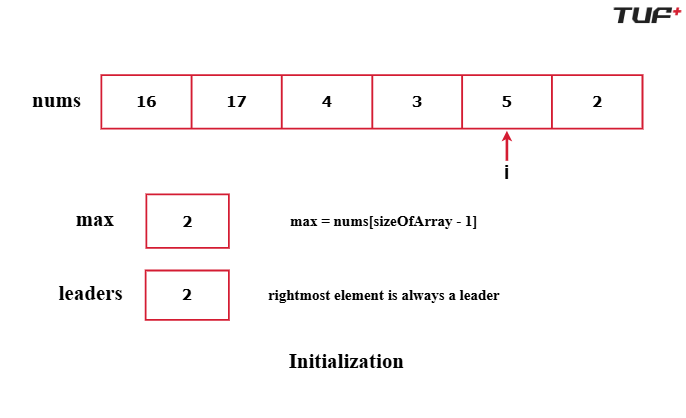
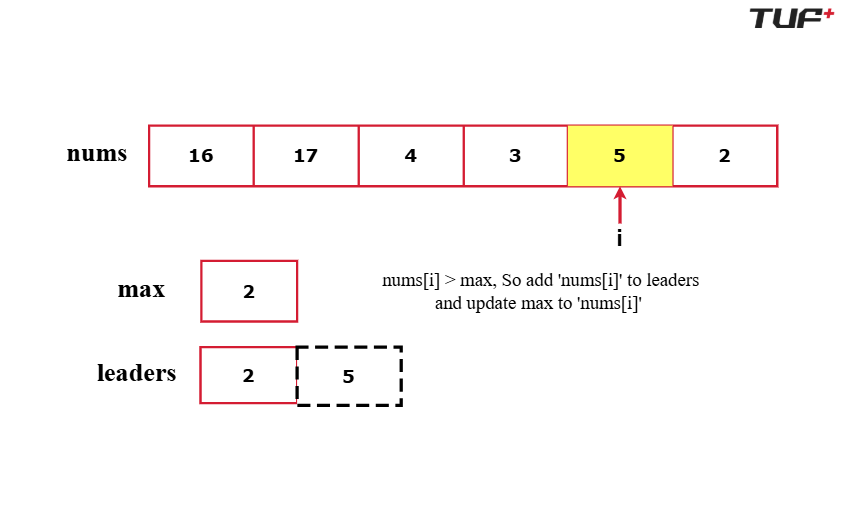
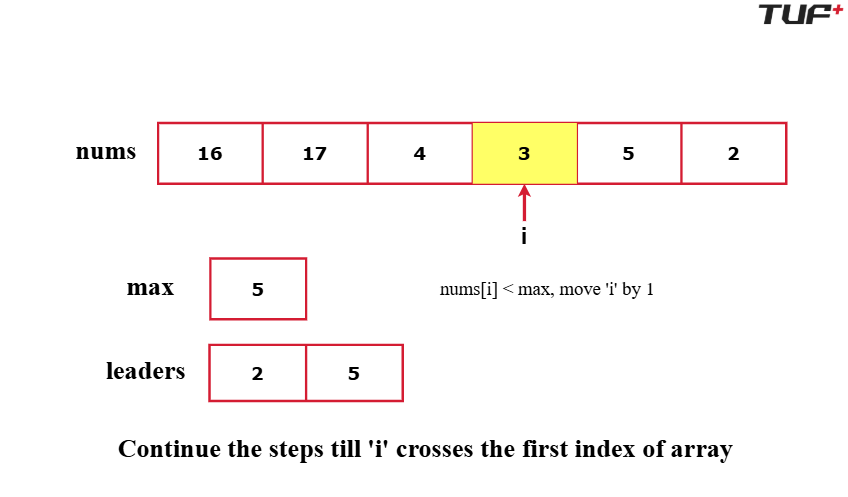
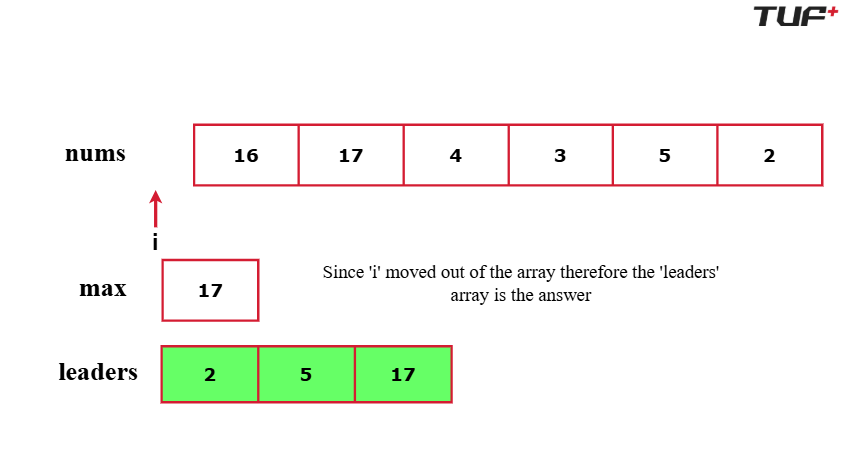

## Optimal Python Solution

In [39]:
class Solution:
    # Function to find the leaders in an array.
    def leaders(self, nums):
        ans = []
        
        if not nums:
            return ans
        
        # Last element of the list is always a leader
        max_val = nums[-1]
        ans.append(nums[-1])
        
        # Check elements from right to left
        for i in range(len(nums) - 2, -1, -1):
            if nums[i] > max_val:
                ans.append(nums[i])
                max_val = nums[i]
        
        '''Reverse the list to match
        the required output order'''
        ans.reverse()
        
        # Return the leaders
        return ans

In [40]:
# Main method
nums = [10, 22, 12, 3, 0, 6]

# Create an instance of the Solution class
finder = Solution()

# Get leaders using class method
ans = finder.leaders(nums)

print("Leaders in the array are: ", end="")
for leader in ans:
    print(leader, end=" ")
print()

Leaders in the array are: 22 12 6 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), for single traversal of array, where N is the length of that array.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as extra space to store answer is not considered.
```

# 10. Longest Consecutive Sequence in an Array :

## Problem Statement :

Given an array nums of n integers.

Return the length of the longest sequence of consecutive integers. The integers in this sequence can appear in any order.


### Examples :

**Example 1:**
```
Input: nums = [100, 4, 200, 1, 3, 2]
Output: 4

Explanation:
The longest sequence of consecutive elements in the array is [1, 2, 3, 4], which has a length of 4. This sequence can be formed regardless of the initial order of the elements in the array.
```

**Example 2:**
```
Input: nums = [0, 3, 7, 2, 5, 8, 4, 6, 0, 1]
Output: 9

Explanation:

The longest sequence of consecutive elements in the array is [0, 1, 2, 3, 4, 5, 6, 7, 8], which has a length of 9. 
```

```
Constraints:
1 <= nums.length <= 10^5
-10^9 <= nums[i] <= 10^9
```

# Brute Force Solution

### Intuition

One simple approach is to look for sequences of consecutive numbers by utilising linear search in the array. For each number 𝑥 in the array, we'll check if the next numbers like 𝑥+1, 𝑥+2, 𝑥+3, and so on, are also in the array. This is like checking if we can build a chain of numbers that follow each other directly. By doing this for every number in the array, we can find the longest chain of consecutive numbers. Finally, we'll find the length of the longest chain among all the numbers in the array.

### Approach

* As you iterate through each number in the array, begin by checking if consecutive numbers like ( x+1, x+2, x+3 ), and so on, exist in the array. The occurrence of the next consecutive number can be checked by using linear search.
* When you find consecutive numbers, start counting them using a counter. Increment this counter each time you find the next consecutive number in the sequence.
* This counter effectively keeps track of how long the current consecutive sequence is as you move through the array and find more consecutive numbers.

## Brute Force Python Solution

In [44]:
class Solution:
    # Helper function to perform linear search
    def linearSearch(self, nums, num):
        n = len(nums)
        # Traverse through the array
        for i in range(n):
            if nums[i] == num:
                return True
        return False

    def longestConsecutive(self, nums):
        # If the array is empty
        if len(nums) == 0:
            return 0
        n = len(nums)
        # Initialize the longest sequence length
        longest = 1

        # Iterate through each element in the array
        for i in range(n):
            # Current element
            x = nums[i]
            # Count of the current sequence
            cnt = 1

            # Search for consecutive numbers
            while self.linearSearch(nums, x + 1):
                # Move to the next number in the sequence
                x += 1
                # Increment the count of the sequence
                cnt += 1

            # Update the longest sequence length found so far
            longest = max(longest, cnt)
        return longest

In [45]:
if __name__ == "__main__":
    a = [100, 4, 200, 1, 3, 2]

    # Create an instance of the Solution class
    solution = Solution()

    # Function call for longest consecutive sequence
    ans = solution.longestConsecutive(a)
    print("The longest consecutive sequence is", ans)

The longest consecutive sequence is 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^3$), where N is the size of the array. In the worst case, all N elements form a single consecutive sequence. Each element in nums is checked in the outer loop O(N) times. The inner while loop could also run O(N) times for one outer iteration. Since linearSearch() is called inside the conditional statement of the while loop and itself runs in O(N), this results in a cubic time complexity.

**Space Complexity:**

The Space Complexity will be O(1), as we are not using any extra space to solve this problem.

# Better Solution

### Intuition

A more efficient method involves sorting the array first and then finding the longest consecutive sequence using a simple iteration.

### Approach

* Begin by sorting the entire array in ascending order. This step helps group consecutive numbers together, simplifying the sequence detection process.
Use a loop to iterate through each element of the sorted array.
* Track consecutive sequences by comparing each element arr[i] with the lastSmaller variable. If arr[i] - 1 == lastSmaller, increment the length of the current sequence (cnt) and update lastSmaller to arr[i]. Skip the current element if arr[i] equals lastSmaller, as it's already part of a sequence. If arr[i] is greater than lastSmaller + 1, start a new sequence from arr[i] by updating lastSmaller to arr[i] and reset cnt to 1.
* Throughout the iteration, compare cnt with longest and update longest to store the maximum sequence length encountered.


Note: Here, we are distorting the given array by sorting it.

## Better Python Solution

In [46]:
class Solution:
    def longestConsecutive(self, nums):
        n = len(nums)

        # Return 0 if array is empty
        if n == 0:
            return 0 

        nums.sort()

        # Track last smaller element
        lastSmaller = float('-inf') 
        # Count current sequence length
        cnt = 0 
        # Track longest sequence length
        longest = 1 

        for i in range(n):
            # If consecutive number exists
            if nums[i] - 1 == lastSmaller:
                # Increment sequence count
                cnt += 1 
                # Update last smaller element
                lastSmaller = nums[i] 
            # If consecutive number doesn't exist
            elif nums[i] != lastSmaller:
                # Reset count for new sequence
                cnt = 1 
                # Update last smaller element
                lastSmaller = nums[i] 
            # Update longest if needed
            longest = max(longest, cnt) 
        return longest

In [47]:
# Sample array
a = [100, 4, 200, 1, 3, 2]

# Create an instance of solution class
solution = Solution() 
# Function call for finding longest consecutive sequence
ans = solution.longestConsecutive(a) 
print("The longest consecutive sequence is", ans)

The longest consecutive sequence is 4


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(NlogN) + O(N), where N is the size of the given array. Here, O(NlogN) is for sorting the array. To find the longest sequence, we use a loop that results in O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1), as we are not using any extra space to solve this problem.
```

# Optimal Solution

### Intuition

In this approach, we refine the brute-force method by focusing only on potential starting numbers of sequences, rather than searching for sequences for every array element. This targeted strategy enhances efficiency using a Set data structure.

### Approach

* We will use two variables, cnt to store the length of the current sequence and longest to store the maximum length found.
* First, all array elements are placed into a set data structure.
* For each element x that can start a sequence (i.e., x - 1 does not exist in the set) we follow the below steps:

```
* Initialize cnt to 1, indicating the starting element of a new sequence.
* Utilize the set to search for consecutive elements such as x + 1, x + 2, and so on, to determine the maximum possible length of the current sequence. Update cnt accordingly.
* Compare cnt with longest and update longest to hold the maximum value (longest = max(longest, cnt)).

Finally, longest will contain the length of the longest consecutive sequence found in the array.
```

## Dry Run

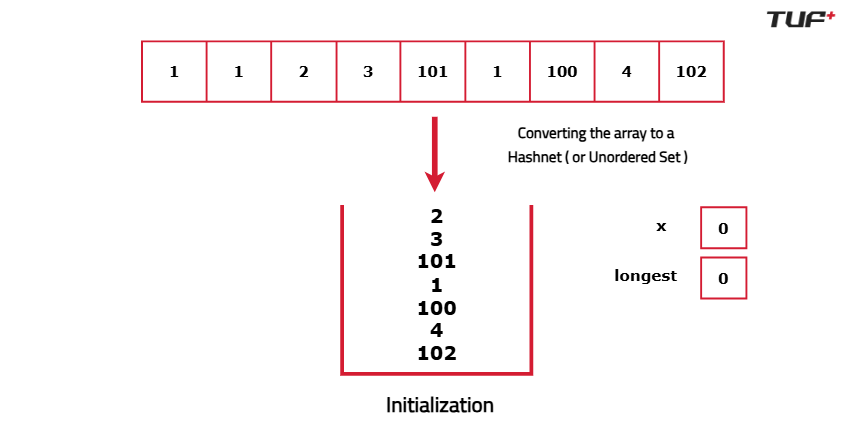
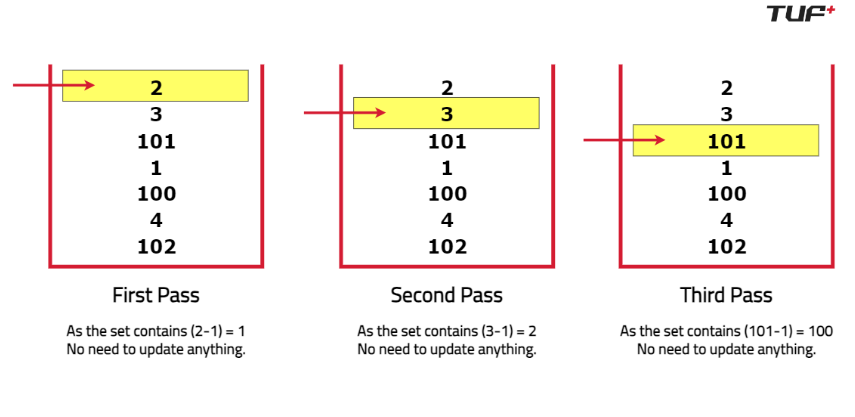
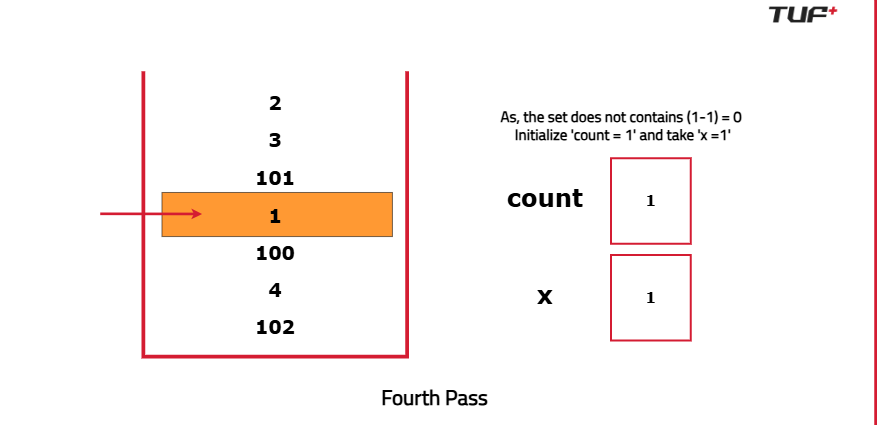
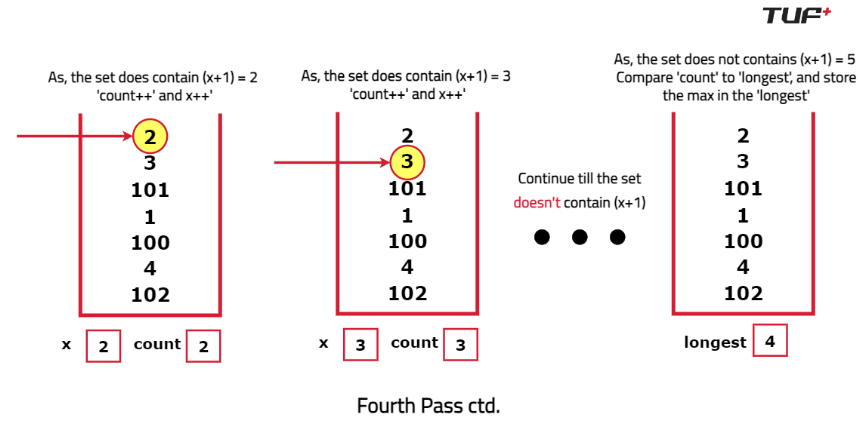
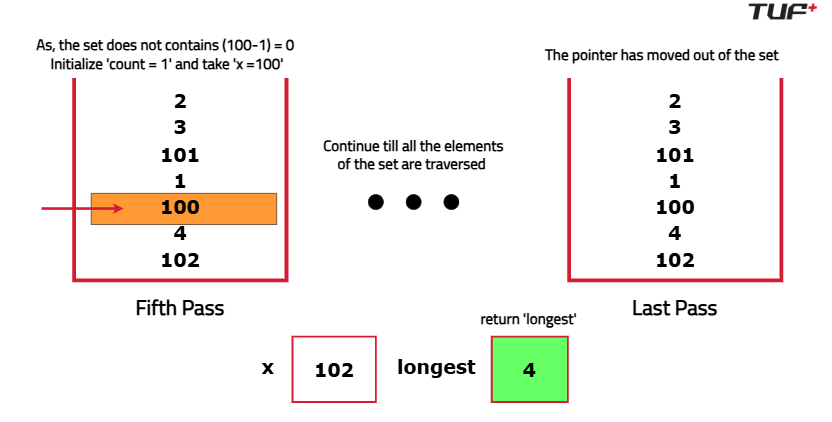

## Optimal Python Solution

In [49]:
class Solution:
    def longestConsecutive(self, nums):
        n = len(nums)
        # If the array is empty
        if n == 0:
            return 0 

        # Initialize the longest sequence length
        longest = 1 
        st = set()

        # Put all the array elements into the set
        for i in range(n):
            st.add(nums[i])

        # Traverse the set to find the longest sequence
        for it in st:
            # Check if 'it' is a starting number of a sequence
            if it - 1 not in st:
                # Initialize the count of the current sequence
                cnt = 1 
                # Starting element of the sequence
                x = it 

                # Find consecutive numbers in the set
                while x + 1 in st:
                    # Move to the next element in the sequence
                    x = x + 1 
                    # Increment the count of the sequence
                    cnt = cnt + 1 
                # Update the longest sequence length
                longest = max(longest, cnt)
        return longest

In [50]:
if __name__ == "__main__":
    a = [100, 4, 200, 1, 3, 2] 
    # Create an instance of the solution class
    solution = Solution() 
    # Function call to find the longest consecutive sequence
    ans = solution.longestConsecutive(a) 
    print("The longest consecutive sequence is", ans)

The longest consecutive sequence is 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O(N) + O(2*N) ~ O(3*N), where N is the size of the array. The function takes O(N) to insert all elements into the set data structure. After that, for every starting element, we find the consecutive elements. Although nested loops are used, the set will be traversed at most twice in the worst case. Therefore, the time complexity is O(2*N) instead of O($N^2$).

**Space Complexity:**

The Space Complexity will be O(N), as we use a set data structure to solve this problem.


<b>Note:</b> The Time Complexity assumes that we use an unordered_set, which has O(1) time complexity for set operations.

In the worst case, if the set operations take O(N), the total time complexity would be approximately O($N^2$). If we use a set instead of an unordered_set, the set operations will have a time complexity of O(logN), resulting in a total time complexity of O(N*logN).

# 11. Set Matrix Zeros :

## Problem Statement :

Given an m x n integer matrix matrix, if an element is 0, set its entire row and column to 0. You must do it in place.


### Examples :

**Example 1:**
```
Input: matrix = [[1,1,1],[1,0,1],[1,1,1]]
Output: [[1,0,1],[0,0,0],[1,0,1]]

Explanation:
Element at position (1,1) is 0, and hence set the entire row 1 and column 1 to 0.
```

**Example 2:**
```
Input: matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
Output: [[0,0,0,0],[0,4,5,0],[0,3,1,0]]

Explanation:

There are two zeroes: (0,0) and (0,3).

Row 0 → all elements become 0.
Column 0 and column 3 → all elements become 0.
```

```
Constraints:
m == matrix.length
n == matrix[0].length
1 <= m, n <= 200
-2^31 <= matrix[i][j] <= 2^31 - 1
```

# Brute Force Solution

### Intuition

We can use extra arrays (or markers) to remember which rows and columns need to be set to zero. This avoids overwriting values prematurely, and we only modify the matrix after scanning the entire matrix.

### Approach

* Create two arrays: one to mark the rows and another to mark the columns that need to be zeroed.
* Traverse the matrix to identify the rows and columns that contain 0s.
* After marking, traverse the matrix again, and for each marked row and column, set all elements in those rows and columns to 0.

## Dry Run

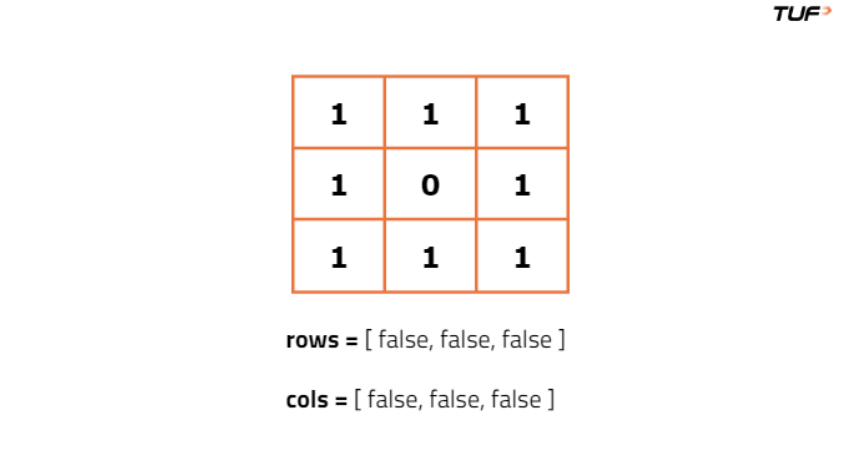
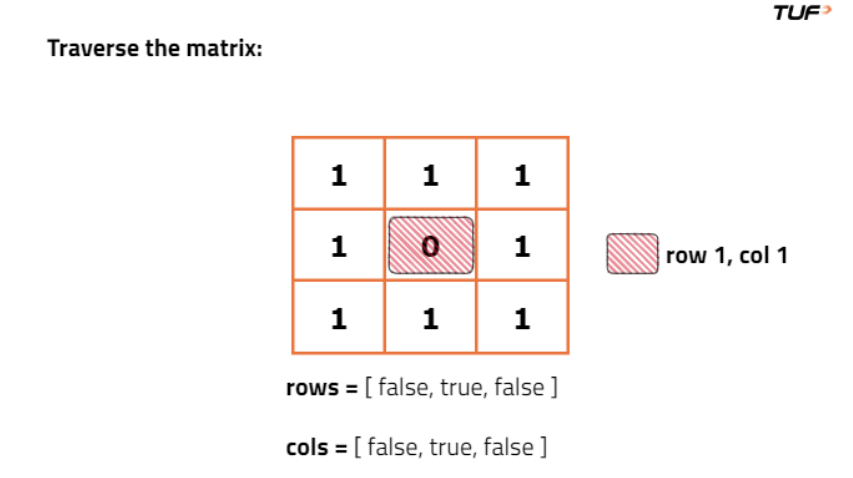
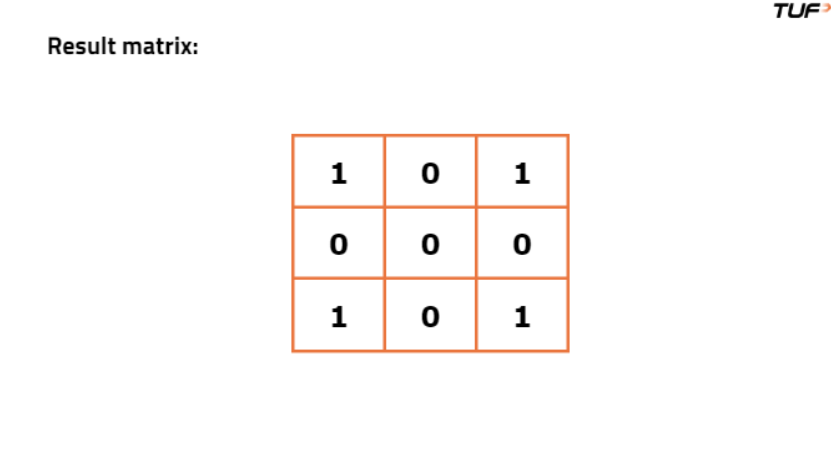

## Brute Force Python Solution

In [59]:
class Solution:
    # Method to set entire rows and columns to 0 if a 0 is found in the matrix
    def setZeroes(self, matrix):
        m = len(matrix)  # Number of rows
        n = len(matrix[0])  # Number of columns
        
        rows = [False] * m  # To mark rows to be set to 0
        cols = [False] * n  # To mark columns to be set to 0
        
        # Step 1: Identify rows and columns to be set to 0
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    rows[i] = True
                    cols[j] = True
        
        # Step 2: Set the corresponding rows and columns to 0
        for i in range(m):
            for j in range(n):
                if rows[i] or cols[j]:
                    matrix[i][j] = 0

In [60]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    
    # Example matrix: 
    # 1 2 3
    # 4 0 6
    # 7 8 9
    matrix = [[1, 2, 3], [4, 0, 6], [7, 8, 9]]
    
    # Output the matrix before and after setting zeroes
    sol.setZeroes(matrix)
    
    for row in matrix:
        print(row)

[1, 0, 3]
[0, 0, 0]
[7, 0, 9]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(m * n), because we are still visiting every element in the matrix twice: once to mark rows and columns and once to set the zeroes.
```

**Space Complexity:**
```
The Space Complexity will be O(m + n), since we need two extra arrays of size m and n for row and column marking.
```

# Optimal Solution

### Intuition

To optimize space complexity, we can use the first row and the first column of the matrix itself to store the markers, instead of using extra arrays. This reduces the extra space from O(m + n) to O(1). However, we need to be cautious about using the first row and column for marking, as they may also be part of the matrix.

### Approach

* Use the first row and the first column to mark which rows and columns need to be set to zero.
* If the first row or the first column needs to be zeroed, use additional variables to remember this.
* Traverse the matrix and mark the first row and first column accordingly.
* Finally, use the first row and column markers to set the respective rows and columns to zero.

## Optimal Python Solution

In [65]:
class Solution:
    def setZeroes(self, matrix):
        m = len(matrix)
        n = len(matrix[0])

        # Step 1: Check if first row or first column need to be zeroed
        first_row_zero = False
        first_col_zero = False

        for j in range(n):
            if matrix[0][j] == 0:
                first_row_zero = True
                break

        for i in range(m):
            if matrix[i][0] == 0:
                first_col_zero = True
                break

        # Step 2: Use first row and column as markers
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][j] == 0:
                    matrix[i][0] = 0
                    matrix[0][j] = 0

        # Step 3: Zero cells based on markers
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][0] == 0 or matrix[0][j] == 0:
                    matrix[i][j] = 0

        # Step 4: Zero first row if needed
        if first_row_zero:
            for j in range(n):
                matrix[0][j] = 0

        # Step 5: Zero first column if needed
        if first_col_zero:
            for i in range(m):
                matrix[i][0] = 0

In [66]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    
    # Example matrix:
    # 1 2 3
    # 4 0 6
    # 7 8 9
    matrix = [[1, 2, 3], [4, 0, 6], [7, 8, 9]]
    
    # Output the result after setting zeroes
    sol.setZeroes(matrix)
    
    for row in matrix:
        print(row)

[1, 0, 3]
[0, 0, 0]
[7, 0, 9]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(m * n), because we are still visiting every element in the matrix twice: once to mark rows and columns and once to set the zeroes.
```

**Space Complexity:**
```
The Space Complexity will be O(1), since we do not use any extra space aside from the matrix itself.
```

## FAQs & Interview Follow-ups :

**Why can’t we just set rows and columns to zero as we find a zero?**
```
If we set a row or column to zero while still scanning the matrix, we might mistakenly zero out elements that weren’t originally supposed to be changed. This corrupts the original data, leading to incorrect results. We need a way to remember which rows and columns need zeroing without affecting the rest of the matrix prematurely.
```

**What do we do with the (0,0) cell, since it's shared by the first row and first column?**
```
The top-left cell creates ambiguity because it serves both as a marker for the first row and the first column. To resolve this, we typically use a separate boolean flag to track whether the first column should be zeroed, while (0,0) continues to track the state of the first row.
```

**Can this solution be adapted to allow modifying the matrix with O(m + n) extra space instead of O(1)?**
```
Yes, if you're allowed O(m + n) extra space, you can use two separate arrays of size m and n to track which rows and columns should be zeroed. This makes the logic simpler and avoids the trickiness of reusing the matrix space itself, but it consumes more memory.
```

**Is this approach specific to this problem or a general strategy for similar problems?**
```
Using part of the input as auxiliary storage is a common space-saving trick, especially when doing in-place transformations. This pattern often appears in matrix problems or problems where marking or tracking is needed without extra memory allocation.
```

# 12. Rotate Matrix by 90 Degrees :

## Problem Statement :

Given an N * N 2D integer matrix, rotate the matrix by 90 degrees clockwise.

The rotation must be done in place, meaning the input 2D matrix must be modified directly.

### Examples :

**Example 1:**

Input: matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

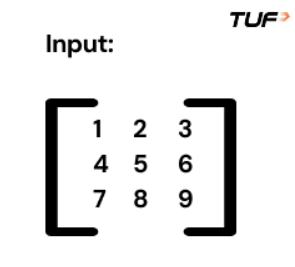

Output: matrix = [[7, 4, 1], [8, 5, 2], [9, 6, 3]]

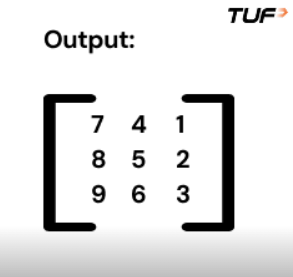


**Example 2:**

Input: matrix = [[0, 1, 1, 2], [2, 0, 3, 1], [4, 5, 0, 5], [5, 6, 7, 0]]

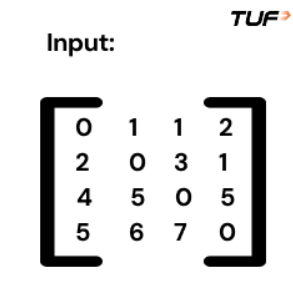

Output: matrix = [[5, 4, 2, 0], [6, 5, 0, 1], [7, 0, 3, 1], [0, 5, 1, 2]]

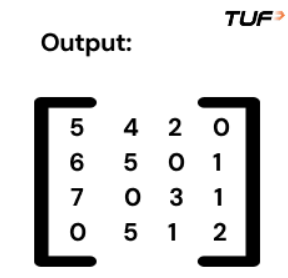


```
Constraints:
n == matrix.length.
n == matrix[i].length.
1 <= n <= 100.
-10^4 <= matrix[i][j] <= 10^4
```

# Brute Force Solution

### Intuition

The naive way is to take another dummy matrix of row and column same as original matrix. Then, take the first row of the original matrix and place it in the last column of the dummy matrix. Next, take the second row of the original matrix and place it in the second last column of the dummy matrix, continuing this process until the last row of the original matrix is placed in the first column of the dummy matrix.

Finally, copy the elements of the dummy matrix back to the original matrix. This procedure ensures that the original matrix is rotated by 90 degrees clockwise.

### Approach

* Initialize a dummy matrix to store the elements in rotated order.
* Iterate in the array using nested for loops say (i) for row and (j) for columns and take the elements of the first row of matrix, put it in last column of the dummy matrix. Repeat this process until index i crosses sizeOfArray.
* Again, copy the elements of the dummy matrix to the original matrix and finally, return the original matrix.

## Brute Force Python Solution

In [67]:
from typing import List

class Solution:
    #Function to rotate the given matrix by 90 degrees clockwise
    
    def rotateMatrix(self, matrix: List[List[int]]) -> None:
        n = len(matrix)
        
        # Initialize new matrix to store rotated values
        rotated = [[0] * n for _ in range(n)]
        
        # Perform rotation logic
        for i in range(n):
            for j in range(n):
                rotated[j][n - i - 1] = matrix[i][j]
        
        # Copy rotated elements back to original matrix
        for i in range(n):
            matrix[i] = rotated[i]

In [69]:
if __name__ == "__main__":
    arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Rotate the matrix
    sol.rotateMatrix(arr)
    
    # Print the rotated matrix
    print("Rotated Image:")
    for row in arr:
        print(" ".join(map(str, row)))

Rotated Image:
7 4 1
8 5 2
9 6 3


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$) + O($N^2$), to linearly iterate and put elements into dummy matrix and another O(N2) to copy elements of dummy matrix back to original matrix.

**Space Complexity:**

The Space Complexity will be O($N^2$), to store the elements in the dummy matrix.

# Optimal Solution

### Intuition

The optimal way is to find the transpose of the matrix, which ensures that the first row of the matrix becomes the first column, the second row becomes the second column, and so on. Then, reverse each row. This method ensures that the array is rotated 90 degrees without using extra space.

### Approach

* Run nested for loop say (i) for row and (j) for column to iterate the matrix and transpose the matrix to change rows to columns and columns to rows.* 
Loop again to reverse each row of the matrix. Finally return the matrix.

## Dry Run

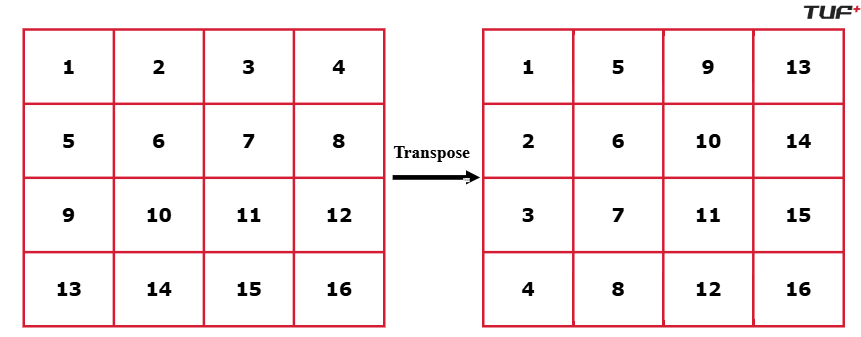
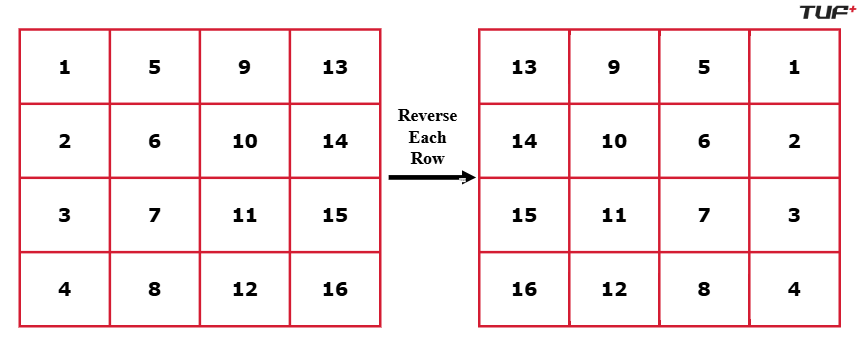

## Optimal Python Solution

In [70]:
from typing import List

class Solution:
    # Rotate the given matrix by 90 degrees clockwise.
    def rotateMatrix(self, matrix: List[List[int]]) -> None:
        n = len(matrix)
        
        # Transpose the matrix
        for i in range(n):
            for j in range(i):
                # Swap elements across the diagonal
                matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
        
        # Reverse each row of the matrix
        for i in range(n):
            for j in range(n // 2):
                # Swap elements symmetrically
                matrix[i][j], matrix[i][n - 1 - j] = matrix[i][n - 1 - j], matrix[i][j]

In [72]:
if __name__ == "__main__":
    arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Rotate the matrix
    sol.rotateMatrix(arr)
    
    # Output the rotated matrix
    print("Rotated Image:")
    for row in arr:
        print(" ".join(map(str, row)))

Rotated Image:
7 4 1
8 5 2
9 6 3


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$) + O($N^2$), to linearly iterate and find transpose of the matrix and another O($N^2$) to find the reverse of each row.

**Space Complexity:**

The Space Complexity will be O(1), as no extra space is being used.

## FAQs & Interview Follow-ups :

**How does the algorithm handle non-square matrices?**
```
The given problem assumes a square N×N matrix. For non-square matrices, a 90-degree rotation would not be in place, as the dimensions change. Handling non-square matrices requires creating a new matrix to store the result.
```

**How does the algorithm handle non-square matrices?**
```
The given problem assumes a square N×N matrix. For non-square matrices, a 90-degree rotation would not be in place, as the dimensions change. Handling non-square matrices requires creating a new matrix to store the result.
```

**Why does transposing and reversing achieve a 90-degree rotation?**
```
Transposing: Converts rows into columns (flipping the matrix across its diagonal). Reversing Each Row: Aligns the transposed columns to their new positions after rotation.
```

**What if the matrix is sparse?**
```
For sparse matrices: Use a coordinate-based representation (e.g., a dictionary of non-zero values). Transform the coordinates for the rotation rather than manipulating the entire matrix. This reduces both time and space complexity for large sparse matrices.
```

# 13. Print the Matrix in a Spiral Manner :

## Problem Statement :

Given an M * N matrix, print the elements in a clockwise spiral manner.

Return an array with the elements in the order of their appearance when printed in a spiral manner.


### Examples :

**Example 1:**
```
Input: matrix = [[1, 2, 3], [4 ,5 ,6], [7, 8, 9]]
Output: [1, 2, 3, 6, 9, 8, 7, 4, 5]

Explanation:
The elements in the spiral order are 1, 2, 3 -> 6, 9 -> 8, 7 -> 4, 5.
```

**Example 2:**
```
Input: matrix = [[1, 2, 3, 4], [5, 6, 7, 8]]
Output: [1, 2, 3, 4, 8, 7, 6, 5]

Explanation:
The elements in the spiral order are 1, 2, 3, 4 -> 8, 7, 6, 5.
```

```
Constraints:
m == matrix.length
n == matrix[i].length
1 <= m, n <= 100
-100 <= matrix[i][j] <= 100
```

# Optimal Solution

### Intuition

The idea is to use four separate loops to print the array elements in spiral. 1st loop will print the elements from left to right. 2nd loop will print the elements from top to bottom. 3rd loop will print the elements from right to left. 4th loop will print the elements from bottom to top.

### Approach

* Initialize four variables top as 0, left as 0, bottom as TotalRow - 1, right as ToatalColumn - 1.
* Iterate till top is less than or equal to bottom and left less than or equal to right.
* For moving left to right use a loop (say i) and add the elements. Increment top by 1.
* For moving top to bottom use another loop and add the elements in answer. Decrement right by 1.
* If top is less than or equal to bottom then for moving right to left use another loop and add the elements in answer. Decrement bottom by 1.
* If left is less than or equal to right then for moving bottom to top take another loop and add the elements in answer. Increment left by 1. Lastly, return the answer.

## Illustration

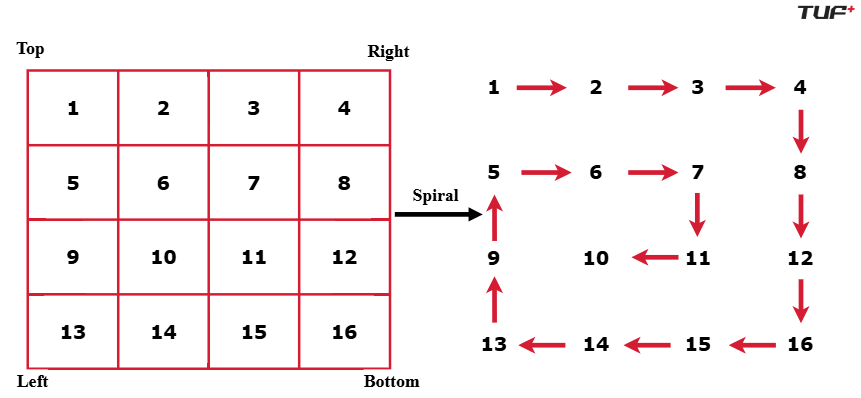

## Optimal Python Solution

In [73]:
from typing import List

class Solution:
    # Function to print matrix in spiral manner
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        ans = []
        
        # Number of rows
        n = len(matrix)

         # Number of columns
        m = len(matrix[0])
        
        # Initialize pointers for traversal
        top, left = 0, 0
        bottom, right = n - 1, m - 1
        
        # Traverse the matrix in spiral order
        while top <= bottom and left <= right:
            # Traverse from left to right
            for i in range(left, right + 1):
                ans.append(matrix[top][i])
            top += 1
            
            # Traverse from top to bottom
            for i in range(top, bottom + 1):
                ans.append(matrix[i][right])
            right -= 1
            
            # Traverse from right to left
            if top <= bottom:
                for i in range(right, left - 1, -1):
                    ans.append(matrix[bottom][i])
                bottom -= 1
            
            # Traverse from bottom to top
            if left <= right:
                for i in range(bottom, top - 1, -1):
                    ans.append(matrix[i][left])
                left += 1
        
        #Return the ans
        return ans

In [74]:
# Test the solution
if __name__ == "__main__":
    mat = [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ]
    
    # Create an instance of the Solution class
    finder = Solution()
    
    # Get spiral order using class method
    ans = finder.spiralOrder(mat)

    print("Elements in spiral order are:", ans)

Elements in spiral order are: [1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(M * N) since all the elements are being traversed once and there are total N * M elements ( M elements in each row and total N rows) so the time complexity will be O(N * M).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as extra space to store answer is not considered.
```

## FAQs & Interview Follow-ups :

**How does the algorithm avoid revisiting elements?**
```
After traversing a boundary, adjust it inward: Increment top after traversing the top row. Decrement right after traversing the right column. Decrement bottom after traversing the bottom row. Increment left after traversing the left column.
```

**How do I handle the center element in an odd-dimensional matrix?**
```
In an odd-dimensional square matrix, the center element is visited during the last iteration. No special handling is needed as the shrinking boundaries naturally include it in the traversal.
```

**How would you handle a sparse matrix?**
```
For sparse matrices: Use a coordinate-based approach to track only non-zero elements. Perform the traversal using the coordinates of active elements instead of iterating through every cell.
```

**How would you modify the algorithm for counterclockwise spiral traversal?**
```
To traverse counterclockwise : Start with the left column (top to bottom). Traverse the bottom row (left to right). Traverse the right column (bottom to top). Traverse the top row (right to left).
```

# 14. Count Subarrays with Given Sum :

## Problem Statement :

Given an array of integers nums and an integer k, return the total number of subarrays whose sum equals to k.

### Examples :

**Example 1:**
```
Input: nums = [1, 1, 1], k = 2
Output: 2

Explanation: In the given array [1, 1, 1], there are two subarrays that sum up to 2: [1, 1] and [1, 1]. Hence, the output is 2.
```

**Example 2:**
```
Input: nums = [1, 2, 3], k = 3
Output: 2

Explanation: In the given array [1, 2, 3], there are two subarrays that sum up to 3: [1, 2] and [3]. Hence, the output is 2.
```

```
Constraints:
1 <= nums.length <= 105
-1000 <= nums[i] <= 1000
-10^7 <= k <= 10^7
```

# Brute Force Solution

### Intuition

To find the number of subarrays with a sum equal to k, use three nested loops. The first two loops (i and j) will iterate over every possible starting and ending index of a subarray, respectively. In each iteration, the subarray range will be from index i to index j. Using a third loop, calculate the sum of the elements in the subarray [i…j], then count only those subarrays where the calculated sum equals k.

### Approach

* First, use a loop (i) to select every possible starting index of the subarray. The starting indices can range from index 0 to index n-1 (where n is the size of the array).
* Inside this loop, run another loop (j) to signify the ending index of the subarray. For each subarray starting from index i, the possible ending indices can vary from index i to n-1.
* Next, for each subarray defined by the range i to j (i.e., arr[i…j]), use another loop to calculate the sum of all the elements in that subarray.
After calculating the sum, check if the sum is equal to the given k. If it is, increase the count.

## Brute Force Python Solution

In [75]:
class Solution:
    def subarraySum(self, nums, k):
        n = len(nums)
        # Number of subarrays
        cnt = 0

        # starting index i
        for i in range(n):
            # ending index j
            for j in range(i, n):

                # calculate the sum of subarray [i...j]
                sum = 0
                for K in range(i, j + 1):
                    sum += nums[K]

                # Increase the count if sum == k:
                if sum == k:
                    cnt += 1
        return cnt

In [76]:
if __name__ == "__main__":
    solution = Solution()
    nums = [3, 1, 2, 4]
    k = 6
    # Function call to find the result
    cnt = solution.subarraySum(nums, k)
    print("The number of subarrays is:", cnt)

The number of subarrays is: 2


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^3$), where N is the size of the array. We are using three nested loops here. Though all loops are not running exactly N times, the time complexity will be approximately O($N^3$).

**Space Complexity:**

The Space Complexity will be O(1), as we are not using any extra space.

# Better Solution

### Intuition

If we carefully observe, we can notice that to get the sum of the current subarray, the only need is to add the current element (i.e., arr[j]) to the sum of the previous subarray, arr[i…j-1]. Assume the previous subarray is arr[i…j-1] and the current subarray is arr[i…j]. The sum of arr[i…j] can be calculated as:

```
Sum of arr[i…j] = Sum of (arr[i…j-1]) + arr[j]
```

This way, eliminate the third loop, and while moving the j pointer, continuously calculate the sum.

### Approach

* First, run a loop (i) that will select every possible starting index of the subarray. The starting indices can range from index 0 to index n-1 (where n is the array size).
* Inside this loop, run another loop (j) that will signify the ending index as well as the current element of the subarray. For every subarray starting from index i, the possible ending indices can range from index i to n-1 (where n is the array size).
* Within the j loop, add the current element to the sum of the previous subarray, i.e., sum = sum + arr[j].
* After calculating the sum, check if the sum is equal to the given k. If it is, increment the count.

## Better Python Solution

In [77]:
class Solution:
    def subarraySum(self, nums, k):
        n = len(nums)
        # Number of subarrays
        count = 0

        # starting index
        for startIndex in range(n):
            currentSum = 0
            # ending index
            for endIndex in range(startIndex, n):
                # calculate the sum of subarray [startIndex...endIndex]
                # sum of [startIndex..endIndex-1] + nums[endIndex]
                currentSum += nums[endIndex]

                # Increase the count if currentSum == k:
                if currentSum == k:
                    count += 1
        return count

In [78]:
if __name__ == "__main__":
    solution = Solution()
    nums = [3, 1, 2, 4]
    k = 6
    # Function call to find the result
    count = solution.subarraySum(nums, k)
    print("The number of subarrays is:", count)

The number of subarrays is: 2


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the size of the array. We are using two nested loops here, each running for approximately N times. Therefore, the time complexity will be approximately O($N^2$).

**Space Complexity:**

The Space Complexity will be O(1), as we are not using any extra space to solve this problem.

# Optimal Solution

### Intuition

n this approach, we will use the concept of prefix sums to solve the problem. The prefix sum of a subarray ending at index i is simply the sum of all the elements up to that index.

### Observation

Assume the prefix sum of a subarray ending at index 𝑖 is 𝑥. Within this subarray, we look for another subarray ending at 𝑖 whose sum is 𝑘. If such a subarray exists, the prefix sum of the remaining part must be 𝑥−𝑘. For a subarray ending at index 𝑖 with a prefix sum 𝑥, removing the segment with a prefix sum of 𝑥−𝑘 leaves a segment whose sum is 𝑘. The number of subarrays with sum 𝑘 is equal to the number of subarrays with a prefix sum of 𝑥−𝑘.

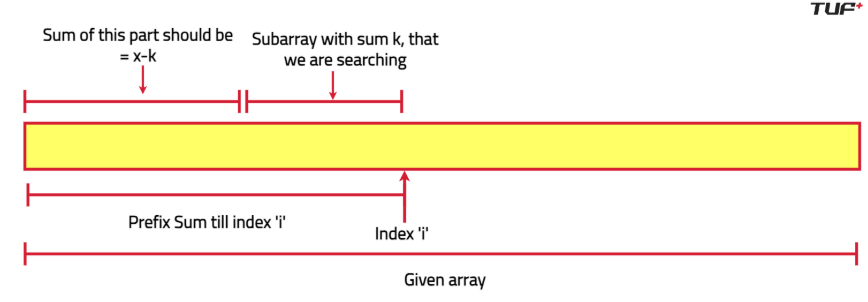

Instead of directly searching for subarrays with sum 𝑘, we track the occurrence of each prefix sum using a map. The map stores each prefix sum along with its frequency. At each index 𝑖, we check the map to find how many times subarrays with the prefix sum 𝑥−𝑘 have occurred and add this number to our answer. This process is applied for all indices from 0 to 𝑛−1, where 𝑛 is the size of the array.

### Approach

* First, declare a map to store the prefix sums and their counts. Initially, set the value of 0 to 1 in the map to handle cases where a subarray equals the target sum k.
* Now, run a loop from index 0 to n-1 (where n is the size of the array). For each index i, we will add the current element arr[i] to the prefix sum, calculate the required prefix sum x-k, add the occurrence of the prefix sum x-k (i.e., map[x-k]) to our answer, and store the current prefix sum in the map, increasing its count by 1.
* Setting the initial value of 0 to 1 in the map is crucial for handling edge cases. For example, if the array is [3, -3, 1, 1, 1] and k is 3, at index 0, the prefix sum is 3, which equals k. The prefix sum of the part to be removed should be x-k = 3-3 = 0.
* Without setting the value of 0 beforehand, the map would return 0 for the key 0, meaning we wouldn't count the subarray starting from the beginning correctly. By setting the initial value of 0 to 1, ensure that such subarrays are correctly counted from the start. This adjustment ensures that any subarray starting at the beginning of the array and equalling k is not overlooked.

## Dry Run

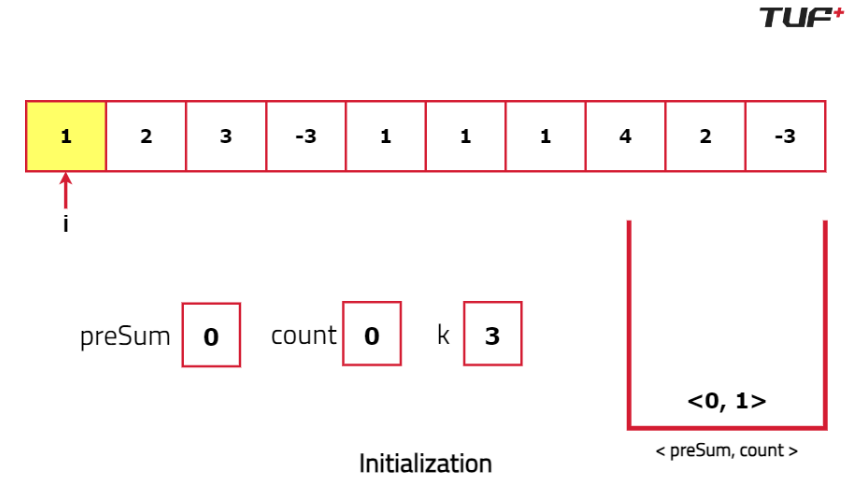
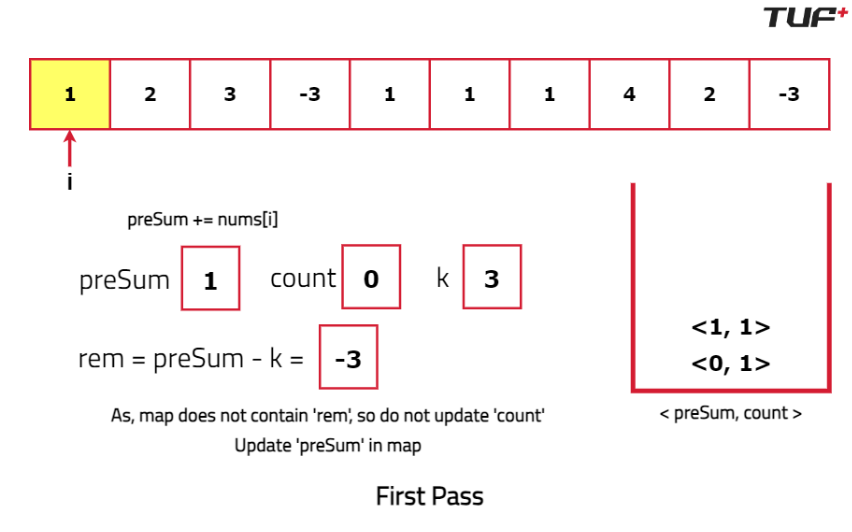
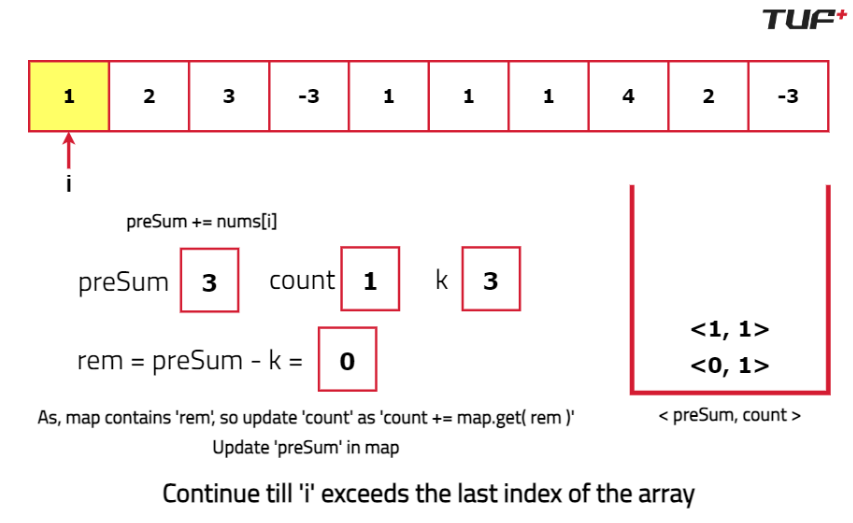
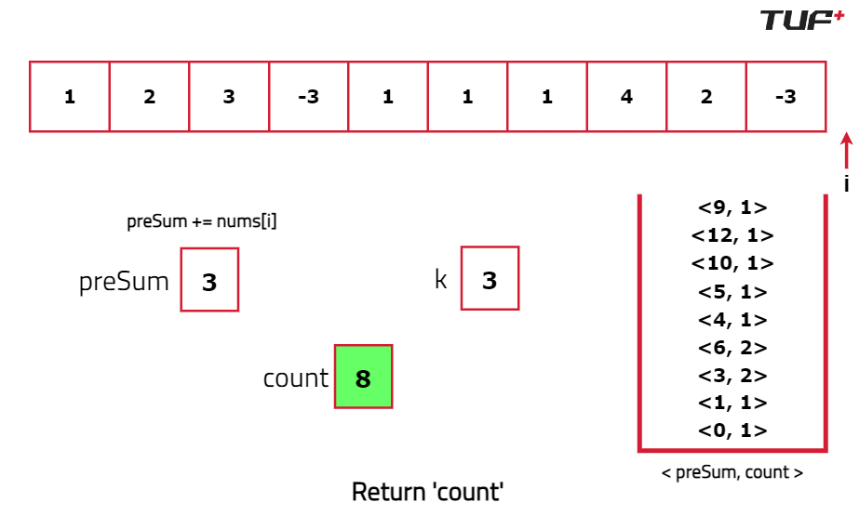

## Optimal Python Solution

In [79]:
class Solution:
    def subarraySum(self, nums, k):
        n = len(nums)
        prefix_sum_map = {0: 1}
        current_prefix_sum = 0
        subarray_count = 0

        for i in range(n):
            # Add current element to the prefix sum:
            current_prefix_sum += nums[i]

            """Calculate the value to remove
           (current_prefix_sum - k)"""
            sum_to_remove = current_prefix_sum - k

            """ Add the number of subarrays 
            with the sum to be removed"""
            subarray_count += prefix_sum_map.get(sum_to_remove, 0)

            """ Update the count of  current
            prefix sum in the map"""
            prefix_sum_map[current_prefix_sum] = prefix_sum_map.get(current_prefix_sum, 0) + 1

        return subarray_count

In [80]:
if __name__ == "__main__":
    # Create an instance of the Solution class
    solution = Solution()
    nums = [3, 1, 2, 4]
    k = 6
    # Function call to get the result
    subarray_count = solution.subarraySum(nums, k)
    print("The number of subarrays is:", subarray_count)

The number of subarrays is: 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) or O(N*logN) depending on the map data structure used, where N is the size of the array. For example, if we use an unordered_map in C++, the time complexity will be O(N), but if we use a map, the time complexity will be O(N*logN). The minimum complexity is O(N) as we are using a single loop to traverse the array.
```

**Space Complexity:**
```
The Space Complexity will be O(N) as we are using a map data structure.
```